In [1]:
import syft as sy

In [2]:
duet = sy.join_duet(loopback=True)

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [10]:
duet2 = sy.join_duet(loopback=True)

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > CONNECTED!


In [3]:
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: a25de6f4c0bf4aacb7f86f5691989e4f>,[x_train],,<class 'torch.Tensor'>
1,<UID: 1cb819713fc64832bf2464e6e70cc235>,[x_test],,<class 'torch.Tensor'>
2,<UID: beed35c6837f489182ce57ef8da327ab>,[y_train],,<class 'torch.Tensor'>
3,<UID: 8f8c2e4bd41a44ea8a1dc5bc5f18ec8f>,[y_test],,<class 'torch.Tensor'>


# Data pointer of worker 1

In [4]:
x_train_ptr = duet.store[0]
x_test_ptr = duet.store[1]
y_train_ptr = duet.store[2]
y_test_ptr = duet.store[3]

In [5]:
x_train = x_train_ptr.get(
            reason="To evaluate training progress",
            request_block=True,
            timeout_secs=5,
        )

In [6]:
x_test = x_test_ptr.get(
            reason="To evaluate training progress",
            request_block=True,
            timeout_secs=5,
        )

In [7]:
y_train = y_train_ptr.get(
            reason="To evaluate training progress",
            request_block=True,
            timeout_secs=5,
        )

In [8]:
y_test = y_test_ptr.get(
            reason="To evaluate training progress",
            request_block=True,
            timeout_secs=5,
        )

In [9]:
x_train.shape

torch.Size([1470, 3, 64, 64])

In [11]:
duet2.store.pandas

,ID,Tags,Description,object_type
0,<UID: a900d928059e400bb5ce0f1a5e9e94a2>,[worker2 (x_train)],,<class 'torch.Tensor'>
1,<UID: 2e36cefae90347ff98240428d9f27279>,[worker2 (x_test)],,<class 'torch.Tensor'>
2,<UID: ccadcf7028474e179308596704008f2c>,[worker2 (y_train)],,<class 'torch.Tensor'>
3,<UID: 409e7313ff48483da8d36516f39a6d84>,[worker2 (y_test)],,<class 'torch.Tensor'>


# Data pointer of worker 2

In [12]:
x_train_ptr_worker2 = duet2.store[0]
x_test_ptr_worker2 = duet2.store[1]
y_train_ptr_worker2 = duet2.store[2]
y_test_ptr_worker2 = duet2.store[3]

In [13]:
x_train_worker2 = x_train_ptr_worker2.get(
            reason="To evaluate training progress",
            request_block=True,
            timeout_secs=5,
        )

In [14]:
x_test_worker2 = x_test_ptr_worker2.get(
            reason="To evaluate training progress",
            request_block=True,
            timeout_secs=5,
        )

In [15]:
y_train_worker2 = y_train_ptr_worker2.get(
            reason="To evaluate training progress",
            request_block=True,
            timeout_secs=5,
        )

In [16]:
y_test_worker2 = y_test_ptr_worker2.get(
            reason="To evaluate training progress",
            request_block=True,
            timeout_secs=5,
        )

In [17]:
x_train_worker2.shape

torch.Size([1959, 3, 64, 64])

# Import library

In [18]:
import torch.nn as nn
import torch
import torch.optim as optim
import torch as th
import numpy as np
import copy
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

# Data loader for worker 1 and worker 2

In [19]:
train_dataset_worker1 = TensorDataset(x_train, y_train)
test_dataset_worker1 = TensorDataset(x_test, y_test)

In [20]:
batch_size = 30
train_dataloader_worker1 = DataLoader(train_dataset_worker1, batch_size=batch_size, shuffle=True)
test_dataloader_worker1 = DataLoader(test_dataset_worker1, batch_size = batch_size, shuffle=False)

In [21]:
train_dataset_worker2 = TensorDataset(x_train_worker2, y_train_worker2)
test_dataset_worker2 = TensorDataset(x_test_worker2, y_test_worker2)

In [22]:
batch_size = 30
train_dataloader_worker2 = DataLoader(train_dataset_worker2, batch_size=batch_size, shuffle=True)
test_dataloader_worker2 = DataLoader(test_dataset_worker2, batch_size = batch_size, shuffle=False)

In [23]:
len(train_dataloader_worker2)


66

# Global model define

In [24]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(16*13*13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 7)
        
    def forward(self, x):
        x = self.pool1(th.relu(self.conv1(x)))
        x = self.pool2(th.relu(self.conv2(x)))
        x = th.flatten(x, start_dim=1)
        x = th.relu(self.fc1(x))
        x = th.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [25]:
local_model = LeNet()

# Copy of local model for worker 1 and worker 2

In [26]:
model_w1 = copy.deepcopy(local_model)
model_w2 = copy.deepcopy(local_model)

state_dict = copy.deepcopy(local_model.state_dict())
model_w1.load_state_dict(state_dict)
model_w2.load_state_dict(state_dict)

<All keys matched successfully>

# Model training for worker 1

In [27]:
def model_train_worker1(model, train_dataloader, test_dataloader):
    lambda_l2 = 0.03
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=lambda_l2)
    criterion = nn.CrossEntropyLoss()
    train_loss = []
    test_loss = []
    num_epochs = 500
    _train_loss = 0.0
    for epoch in range(num_epochs):
        for i, batch in enumerate(train_dataloader):
            inputs, targets = batch
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.long())
            # Add L2 regularization to the loss
            l2_reg = sum(torch.norm(param) for param in model.parameters())
            loss += lambda_l2 * l2_reg
            _train_loss +=loss.item()
            loss.backward()
            optimizer.step()
        _train_loss /=len(train_dataloader)
        train_loss.append(_train_loss)

        _test_loss = 0.0
        model.eval()
        with torch.no_grad():
            for i, batch in enumerate(test_dataloader):
                inputs, targets = batch
                outputs = model(inputs)
                loss = criterion(outputs, targets.long())
                _test_loss += loss.item()
        _test_loss /= len(test_dataloader)
        test_loss.append(_test_loss)
        print(f"Epoch {epoch}: Train_loss = {_train_loss} Test_loss = {_test_loss}")
    return train_loss, test_loss

# Model training for worker 2

In [28]:
def model_train_worker2(model, train_dataloader, test_dataloader):
    lambda_l2 = 0.02 
    optimizer = optim.Adam(model.parameters(), lr=0.002, weight_decay=lambda_l2)
    criterion = nn.CrossEntropyLoss()
    train_loss_worker2 = []
    test_loss_worker2 = []
    num_epochs = 500
    train_loss = 0.0
    for epoch in range(num_epochs):
        for i, batch in enumerate(train_dataloader):
            inputs, targets = batch
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.long())
            # Add L2 regularization to the loss
            l2_reg = sum(torch.norm(param) for param in model.parameters())
            loss += lambda_l2 * l2_reg
            train_loss +=loss.item()
            loss.backward()
            optimizer.step()
        train_loss /=len(train_dataloader)
        train_loss_worker2.append(train_loss)

        test_loss = 0.0
        model.eval()
        with torch.no_grad():
            for i, batch in enumerate(test_dataloader):
                inputs, targets = batch
                outputs = model(inputs)
                loss = criterion(outputs, targets.long())
                test_loss += loss.item()
        test_loss /= len(test_dataloader)
        test_loss_worker2.append(test_loss)
        print(f"Epoch {epoch}: Train_loss = {train_loss} Test_loss = {test_loss}")
    return train_loss_worker2, test_loss_worker2

# Model aggregation function for median-aggregation

In [29]:
    def model_update_median(model_worker1, model_worker2, local_model):
        local_optim = optim.Adam(local_model.parameters(), lr=0.001)

        conv1_weight = torch.median(torch.stack([model_worker1.conv1.weight.data,model_worker2.conv1.weight.data]), dim=0).values
        conv1_bias = torch.median(torch.stack([model_worker1.conv1.bias.data,model_worker1.conv1.bias.data]), dim=0).values

        conv2_weight = torch.median(torch.stack([model_worker1.conv2.weight.data,model_worker2.conv2.weight.data]),dim=0).values
        conv2_bias = torch.median(torch.stack([model_worker1.conv2.bias.data,model_worker2.conv2.bias.data]), dim=0).values

        fc1_weight = torch.median(torch.stack([model_worker1.fc1.weight.data,model_worker2.fc1.weight.data]), dim=0).values
        fc1_bias = torch.median(torch.stack([model_worker1.fc1.bias.data,model_worker2.fc1.bias.data]), dim=0).values

        fc2_weight = torch.median(torch.stack([model_worker1.fc2.weight.data,model_worker2.fc2.weight.data]), dim=0).values
        fc2_bias = torch.median(torch.stack([model_worker1.fc2.bias.data,model_worker2.fc2.bias.data]), dim=0).values

        fc3_weight = torch.median(torch.stack([model_worker1.fc3.weight.data,model_worker2.fc3.weight.data]),dim=0).values
        fc3_bias = torch.median(torch.stack([model_worker1.fc3.bias.data,model_worker2.fc3.bias.data]), dim=0).values

        local_model.conv1.weight = torch.nn.parameter.Parameter(conv1_weight)
        local_model.conv1.bias = torch.nn.parameter.Parameter(conv1_bias)
        local_model.conv2.weight = torch.nn.parameter.Parameter(conv2_weight)
        local_model.conv2.bias = torch.nn.parameter.Parameter(conv2_bias)
        local_model.fc1.weight = torch.nn.parameter.Parameter(fc1_weight)
        local_model.fc1.bias = torch.nn.parameter.Parameter(fc1_bias)
        local_model.fc2.weight = torch.nn.parameter.Parameter(fc2_weight)
        local_model.fc2.bias = torch.nn.parameter.Parameter(fc2_bias)
        local_model.fc3.weight = torch.nn.parameter.Parameter(fc3_weight)
        local_model.fc3.bias = torch.nn.parameter.Parameter(fc3_bias)

        local_optim.step()
        return local_model

# Model aggregation function for avg-aggregation

In [30]:
def model_update_avg(model_worker1, model_worker2, local_model):
    local_optim = optim.Adam(local_model.parameters(), lr=0.001)
    conv1_weight = (model_worker1.conv1.weight.data+model_worker2.conv1.weight.data)/2
    conv1_bias = (model_worker1.conv1.bias.data+model_worker1.conv1.bias.data)/2
    conv2_weight = (model_worker1.conv2.weight.data+model_worker2.conv2.weight.data)/2
    conv2_bias = (model_worker1.conv2.bias.data+model_worker2.conv2.bias.data)/2
    fc1_weight = (model_worker1.fc1.weight.data+model_worker2.fc1.weight.data)/2
    fc1_bias = (model_worker1.fc1.bias.data+model_worker2.fc1.bias.data)/2
    fc2_weight = (model_worker1.fc2.weight.data+model_worker2.fc2.weight.data)/2
    fc2_bias = (model_worker1.fc2.bias.data+model_worker2.fc2.bias.data)/2
    fc3_weight = (model_worker1.fc3.weight.data+model_worker2.fc3.weight.data)/2
    fc3_bias = (model_worker1.fc3.bias.data+model_worker2.fc3.bias.data)/2
    
    local_model.conv1.weight = torch.nn.parameter.Parameter(conv1_weight)
    local_model.conv1.bias = torch.nn.parameter.Parameter(conv1_bias)
    local_model.conv2.weight = torch.nn.parameter.Parameter(conv2_weight)
    local_model.conv2.bias = torch.nn.parameter.Parameter(conv2_bias)
    local_model.fc1.weight = torch.nn.parameter.Parameter(fc1_weight)
    local_model.fc1.bias = torch.nn.parameter.Parameter(fc1_bias)
    local_model.fc2.weight = torch.nn.parameter.Parameter(fc2_weight)
    local_model.fc2.bias = torch.nn.parameter.Parameter(fc2_bias)
    local_model.fc3.weight = torch.nn.parameter.Parameter(fc3_weight)
    local_model.fc3.bias = torch.nn.parameter.Parameter(fc3_bias)
    local_optim.step()
    return local_model

# Model aggregation for max-aggregation

In [31]:
def model_update_max(model_worker1, model_worker2, local_model):
    local_optim = optim.Adam(local_model.parameters(), lr=0.001)
    
    conv1_weight = torch.max(torch.stack([model_worker1.conv1.weight.data,model_worker2.conv1.weight.data]), dim=0).values
    conv1_bias = torch.max(torch.stack([model_worker1.conv1.bias.data,model_worker1.conv1.bias.data]), dim=0).values
    
    conv2_weight = torch.max(torch.stack([model_worker1.conv2.weight.data,model_worker2.conv2.weight.data]),dim=0).values
    conv2_bias = torch.max(torch.stack([model_worker1.conv2.bias.data,model_worker2.conv2.bias.data]), dim=0).values
    
    fc1_weight = torch.max(torch.stack([model_worker1.fc1.weight.data,model_worker2.fc1.weight.data]), dim=0).values
    fc1_bias = torch.max(torch.stack([model_worker1.fc1.bias.data,model_worker2.fc1.bias.data]), dim=0).values
    
    fc2_weight = torch.max(torch.stack([model_worker1.fc2.weight.data,model_worker2.fc2.weight.data]), dim=0).values
    fc2_bias = torch.max(torch.stack([model_worker1.fc2.bias.data,model_worker2.fc2.bias.data]), dim=0).values
    
    fc3_weight = torch.max(torch.stack([model_worker1.fc3.weight.data,model_worker2.fc3.weight.data]),dim=0).values
    fc3_bias = torch.max(torch.stack([model_worker1.fc3.bias.data,model_worker2.fc3.bias.data]), dim=0).values
    
    local_model.conv1.weight = torch.nn.parameter.Parameter(conv1_weight)
    local_model.conv1.bias = torch.nn.parameter.Parameter(conv1_bias)
    local_model.conv2.weight = torch.nn.parameter.Parameter(conv2_weight)
    local_model.conv2.bias = torch.nn.parameter.Parameter(conv2_bias)
    local_model.fc1.weight = torch.nn.parameter.Parameter(fc1_weight)
    local_model.fc1.bias = torch.nn.parameter.Parameter(fc1_bias)
    local_model.fc2.weight = torch.nn.parameter.Parameter(fc2_weight)
    local_model.fc2.bias = torch.nn.parameter.Parameter(fc2_bias)
    local_model.fc3.weight = torch.nn.parameter.Parameter(fc3_weight)
    local_model.fc3.bias = torch.nn.parameter.Parameter(fc3_bias)
    
    local_optim.step()
    return local_model

# Loss calculation for avg-aggregation

In [150]:
train_loss_avg = []
test_loss_avg = []
for round in range(4):
    print(f"round: {round}")
    model_w1 = copy.deepcopy(local_model)
    model_w2 = copy.deepcopy(local_model)

    state_dict = copy.deepcopy(local_model.state_dict())
    
    model_w1.load_state_dict(state_dict)
    model_w2.load_state_dict(state_dict)
    
    print('worker1')
    train_loss_w1, test_loss_w1 = model_train_worker1(model_w1, train_dataloader_worker1, test_dataloader_worker1)
    train_loss_avg.append(train_loss_w1)
    test_loss_avg.append(test_loss_w1)
    
    print('worker2')
    train_loss_w2, test_loss_w2 = model_train_worker2(model_w2, train_dataloader_worker2, test_dataloader_worker2)
    train_loss_avg.append(train_loss_w2)
    test_loss_avg.append(test_loss_w2)
    local_model = model_update_avg(model_w1, model_w2, local_model)

round: 0
worker1
Epoch 0: Train_loss = 2.2278604994014817 Test_loss = 1.9273411546434676
Epoch 1: Train_loss = 2.010867540710224 Test_loss = 1.768775048710051
Epoch 2: Train_loss = 1.9090295702558198 Test_loss = 1.747922806512742
Epoch 3: Train_loss = 1.892977159182112 Test_loss = 1.7693707715897333
Epoch 4: Train_loss = 1.9013229981766242 Test_loss = 1.7539052282060896
Epoch 5: Train_loss = 1.8948761086393093 Test_loss = 1.7259685425531297
Epoch 6: Train_loss = 1.8854372717505585 Test_loss = 1.7233046009427024
Epoch 7: Train_loss = 1.8765238844163683 Test_loss = 1.7278313920611428
Epoch 8: Train_loss = 1.8809875694318845 Test_loss = 1.7218972444534302
Epoch 9: Train_loss = 1.874876259231657 Test_loss = 1.716493703070141
Epoch 10: Train_loss = 1.873088702832438 Test_loss = 1.7288162935347784
Epoch 11: Train_loss = 1.8647196727803526 Test_loss = 1.7287647042955672
Epoch 12: Train_loss = 1.861621351545788 Test_loss = 1.707820211138044
Epoch 13: Train_loss = 1.87126673669851 Test_loss = 1

Epoch 113: Train_loss = 1.1899410620565294 Test_loss = 1.0241220990816753
Epoch 114: Train_loss = 1.175559392054947 Test_loss = 1.0371871902829124
Epoch 115: Train_loss = 1.1889474195379803 Test_loss = 1.0466247569947016
Epoch 116: Train_loss = 1.1927526917630693 Test_loss = 1.0381797438576108
Epoch 117: Train_loss = 1.1831186919118561 Test_loss = 0.9903570186524164
Epoch 118: Train_loss = 1.1626262091226027 Test_loss = 1.0105685109183902
Epoch 119: Train_loss = 1.1572465641616694 Test_loss = 0.9896968886965797
Epoch 120: Train_loss = 1.1545275554026855 Test_loss = 0.9957647522290548
Epoch 121: Train_loss = 1.1737130103974232 Test_loss = 1.0466756025950115
Epoch 122: Train_loss = 1.1615427290875666 Test_loss = 1.015223000730787
Epoch 123: Train_loss = 1.145492117330896 Test_loss = 1.0276261426153637
Epoch 124: Train_loss = 1.1502628663106327 Test_loss = 1.0504592401640755
Epoch 125: Train_loss = 1.1676326559087118 Test_loss = 1.015632538568406
Epoch 126: Train_loss = 1.1428582464880288

Epoch 225: Train_loss = 0.9169459330099119 Test_loss = 0.9004340086664472
Epoch 226: Train_loss = 0.9025931723001402 Test_loss = 0.9068061453955514
Epoch 227: Train_loss = 0.9170149657334657 Test_loss = 0.9510682821273804
Epoch 228: Train_loss = 0.9407446958037577 Test_loss = 0.8877828674657005
Epoch 229: Train_loss = 0.9125237707731115 Test_loss = 0.8805511522860754
Epoch 230: Train_loss = 0.8958434735115632 Test_loss = 0.9175844859509241
Epoch 231: Train_loss = 0.9371584428296937 Test_loss = 0.8861563688232785
Epoch 232: Train_loss = 0.9024360528060095 Test_loss = 1.0101504581315177
Epoch 233: Train_loss = 0.9126353124989707 Test_loss = 0.9495660776183719
Epoch 234: Train_loss = 0.9103315202156168 Test_loss = 0.8777423515206292
Epoch 235: Train_loss = 0.8986002931135842 Test_loss = 1.0032626645905631
Epoch 236: Train_loss = 0.9060976422748152 Test_loss = 0.9671119309607006
Epoch 237: Train_loss = 0.9018299371144423 Test_loss = 0.8774283627669016
Epoch 238: Train_loss = 0.911961906601

Epoch 337: Train_loss = 0.7974055686647203 Test_loss = 1.0186603920800346
Epoch 338: Train_loss = 0.7827591500295558 Test_loss = 0.8932446709700993
Epoch 339: Train_loss = 0.7606038905358099 Test_loss = 0.8660964823904491
Epoch 340: Train_loss = 0.7848910686458369 Test_loss = 0.876338467711494
Epoch 341: Train_loss = 0.7726754400135813 Test_loss = 0.8661717843441736
Epoch 342: Train_loss = 0.8011156560875968 Test_loss = 0.9771599003246852
Epoch 343: Train_loss = 0.8041185267156038 Test_loss = 0.9725292835916791
Epoch 344: Train_loss = 0.8090556035386172 Test_loss = 0.9108107373827979
Epoch 345: Train_loss = 0.7832131819050868 Test_loss = 0.8847587747233254
Epoch 346: Train_loss = 0.7588595987909532 Test_loss = 0.8739551263196128
Epoch 347: Train_loss = 0.7706717014344239 Test_loss = 0.9114883102121807
Epoch 348: Train_loss = 0.7783292928521157 Test_loss = 0.9563937683900198
Epoch 349: Train_loss = 0.7872227243809155 Test_loss = 0.9041843314965566
Epoch 350: Train_loss = 0.7634518811739

Epoch 49: Train_loss = 1.1244276899500356 Test_loss = 1.0685401908282577
Epoch 50: Train_loss = 1.1235278187653086 Test_loss = 1.0209300867442428
Epoch 51: Train_loss = 1.1290164643141667 Test_loss = 1.0738105486179221
Epoch 52: Train_loss = 1.1155358048003325 Test_loss = 1.1374082853054177
Epoch 53: Train_loss = 1.1055607896436968 Test_loss = 0.996329128742218
Epoch 54: Train_loss = 1.1109858418675833 Test_loss = 0.9988554448916994
Epoch 55: Train_loss = 1.0949981225638263 Test_loss = 0.99038008780315
Epoch 56: Train_loss = 1.0967658514523575 Test_loss = 0.953246256400799
Epoch 57: Train_loss = 1.059271880705465 Test_loss = 0.9888244332938358
Epoch 58: Train_loss = 1.0782430281651036 Test_loss = 1.118913812883969
Epoch 59: Train_loss = 1.0761422218554129 Test_loss = 0.9562295798597664
Epoch 60: Train_loss = 1.057180686884566 Test_loss = 0.9789079736019003
Epoch 61: Train_loss = 1.0632988744927994 Test_loss = 0.9116357462159519
Epoch 62: Train_loss = 1.0238892462126437 Test_loss = 0.92

Epoch 161: Train_loss = 0.7683458087975437 Test_loss = 0.7616621523067869
Epoch 162: Train_loss = 0.7764948629943631 Test_loss = 0.8107236079100905
Epoch 163: Train_loss = 0.7649807785851909 Test_loss = 0.8068282090384384
Epoch 164: Train_loss = 0.7460156631814457 Test_loss = 0.7409279644489288
Epoch 165: Train_loss = 0.7530992590302575 Test_loss = 0.7533348490451944
Epoch 166: Train_loss = 0.799223381405699 Test_loss = 0.7582101863006065
Epoch 167: Train_loss = 0.7955419794195473 Test_loss = 0.759129002176482
Epoch 168: Train_loss = 0.7590424577628024 Test_loss = 0.730287602235531
Epoch 169: Train_loss = 0.7546787454025831 Test_loss = 0.7659156682162449
Epoch 170: Train_loss = 0.7759760341158674 Test_loss = 0.7846143697870189
Epoch 171: Train_loss = 0.7807909697611994 Test_loss = 0.988784120000642
Epoch 172: Train_loss = 0.8436728280155343 Test_loss = 0.7761405891385572
Epoch 173: Train_loss = 0.7801314983123608 Test_loss = 0.7692523269817747
Epoch 174: Train_loss = 0.7527776158719262

Epoch 273: Train_loss = 0.6631417043170528 Test_loss = 0.76684360668577
Epoch 274: Train_loss = 0.6509000366492121 Test_loss = 0.9367728778000536
Epoch 275: Train_loss = 0.6938166704225466 Test_loss = 0.8464093218589651
Epoch 276: Train_loss = 0.6644767144810791 Test_loss = 0.7839448020376009
Epoch 277: Train_loss = 0.6895472306788143 Test_loss = 0.7900296696301164
Epoch 278: Train_loss = 0.6844211476601437 Test_loss = 0.8213919832788664
Epoch 279: Train_loss = 0.6828508706068109 Test_loss = 0.9113191828645509
Epoch 280: Train_loss = 0.6868263415784173 Test_loss = 0.8394071531706843
Epoch 281: Train_loss = 0.673865958946357 Test_loss = 0.8450880081489168
Epoch 282: Train_loss = 0.6898442296803812 Test_loss = 0.8197011187158781
Epoch 283: Train_loss = 0.6721932681651742 Test_loss = 0.7735588571120953
Epoch 284: Train_loss = 0.6491165641164717 Test_loss = 0.8480481371797365
Epoch 285: Train_loss = 0.6561337355459819 Test_loss = 0.9115596290292411
Epoch 286: Train_loss = 0.679233586613104

Epoch 385: Train_loss = 0.6492470333056032 Test_loss = 0.803480941673805
Epoch 386: Train_loss = 0.6049584265144732 Test_loss = 0.8436293601989746
Epoch 387: Train_loss = 0.6284603618244813 Test_loss = 0.8451370142143348
Epoch 388: Train_loss = 0.6890669223375099 Test_loss = 0.8006793137254387
Epoch 389: Train_loss = 0.6706302315850254 Test_loss = 0.809127230068733
Epoch 390: Train_loss = 0.6235618896118005 Test_loss = 0.7842519067484757
Epoch 391: Train_loss = 0.6130034025071113 Test_loss = 0.759074774281732
Epoch 392: Train_loss = 0.6353261651347955 Test_loss = 0.7484075694248594
Epoch 393: Train_loss = 0.6042682323518289 Test_loss = 0.7778301012927088
Epoch 394: Train_loss = 0.6292735330589836 Test_loss = 0.8056695728466429
Epoch 395: Train_loss = 0.6176761980194158 Test_loss = 0.7866195810252222
Epoch 396: Train_loss = 0.6455366001817588 Test_loss = 0.7670423450141117
Epoch 397: Train_loss = 0.6590449412457464 Test_loss = 0.763744148714789
Epoch 398: Train_loss = 0.6187740571869026

Epoch 98: Train_loss = 0.6812657761747838 Test_loss = 0.9010688634145827
Epoch 99: Train_loss = 0.6887871842971772 Test_loss = 0.721716582775116
Epoch 100: Train_loss = 0.6593088487812275 Test_loss = 0.7723873073146457
Epoch 101: Train_loss = 0.6389993246315864 Test_loss = 0.7675083974997202
Epoch 102: Train_loss = 0.6450147296618421 Test_loss = 0.7743436765103113
Epoch 103: Train_loss = 0.6582579715430958 Test_loss = 0.831285997515633
Epoch 104: Train_loss = 0.6442234901412414 Test_loss = 0.7769586415517897
Epoch 105: Train_loss = 0.6498336629555828 Test_loss = 0.7442780555713744
Epoch 106: Train_loss = 0.6457162678575966 Test_loss = 0.7097603238764263
Epoch 107: Train_loss = 0.6476974308497575 Test_loss = 0.7875526958987826
Epoch 108: Train_loss = 0.6393350748383408 Test_loss = 0.7537349916639782
Epoch 109: Train_loss = 0.6750141907065973 Test_loss = 0.7526416239284334
Epoch 110: Train_loss = 0.6537623744601495 Test_loss = 0.8325817925589425
Epoch 111: Train_loss = 0.6468821284345107

Epoch 209: Train_loss = 0.6509096036779035 Test_loss = 0.7421309153238932
Epoch 210: Train_loss = 0.6220121554177374 Test_loss = 0.8211549179894584
Epoch 211: Train_loss = 0.5904766586192638 Test_loss = 0.7143145764157885
Epoch 212: Train_loss = 0.6121028831353159 Test_loss = 0.7660008810815357
Epoch 213: Train_loss = 0.6370153771183733 Test_loss = 0.818422448067438
Epoch 214: Train_loss = 0.6197835822217761 Test_loss = 0.7823193612552825
Epoch 215: Train_loss = 0.6124528446151146 Test_loss = 0.7982402046521505
Epoch 216: Train_loss = 0.6150143002538319 Test_loss = 0.7392738461494446
Epoch 217: Train_loss = 0.637196848901495 Test_loss = 0.8188031287420363
Epoch 218: Train_loss = 0.5987965296343148 Test_loss = 0.8090317036424365
Epoch 219: Train_loss = 0.6188004487846887 Test_loss = 0.8386608802136921
Epoch 220: Train_loss = 0.6276124615938781 Test_loss = 0.7716904757987886
Epoch 221: Train_loss = 0.64082916699192 Test_loss = 0.7775716441018241
Epoch 222: Train_loss = 0.6226936412754394

Epoch 321: Train_loss = 0.6905186796024523 Test_loss = 0.7523123153618404
Epoch 322: Train_loss = 0.6265551910591675 Test_loss = 0.8489108681678772
Epoch 323: Train_loss = 0.5950404220409794 Test_loss = 0.7662689487139384
Epoch 324: Train_loss = 0.6065514412331492 Test_loss = 0.7649525545892262
Epoch 325: Train_loss = 0.5945401514606572 Test_loss = 0.7887053319386074
Epoch 326: Train_loss = 0.6094693444720679 Test_loss = 0.8003734825622468
Epoch 327: Train_loss = 0.592882311876436 Test_loss = 0.845775135925838
Epoch 328: Train_loss = 0.6021511793245228 Test_loss = 0.7701242835748763
Epoch 329: Train_loss = 0.5881615456271929 Test_loss = 0.726097393603552
Epoch 330: Train_loss = 0.6510841716234553 Test_loss = 0.8096281233287993
Epoch 331: Train_loss = 0.6107952178516045 Test_loss = 0.7930957305999029
Epoch 332: Train_loss = 0.5732633809674315 Test_loss = 0.8104077336334047
Epoch 333: Train_loss = 0.5960139815507871 Test_loss = 0.7526435447590691
Epoch 334: Train_loss = 0.580155408878104

Epoch 33: Train_loss = 0.6181540142786137 Test_loss = 0.7121752706067316
Epoch 34: Train_loss = 0.6417093542659097 Test_loss = 0.7660540301224281
Epoch 35: Train_loss = 0.647586807559602 Test_loss = 0.7019434530159523
Epoch 36: Train_loss = 0.6999550351131847 Test_loss = 0.6414597882279034
Epoch 37: Train_loss = 0.6053665870196724 Test_loss = 0.6537559679869948
Epoch 38: Train_loss = 0.6010334726442097 Test_loss = 0.9983193350249323
Epoch 39: Train_loss = 0.6476451004037189 Test_loss = 0.6790716668655132
Epoch 40: Train_loss = 0.6371425807844644 Test_loss = 0.6565354271181698
Epoch 41: Train_loss = 0.6305844437900984 Test_loss = 0.6819676222472355
Epoch 42: Train_loss = 0.641035963116005 Test_loss = 0.7785205841064453
Epoch 43: Train_loss = 0.6190564693979831 Test_loss = 0.6817876018326858
Epoch 44: Train_loss = 0.6248911818801339 Test_loss = 0.669823791446357
Epoch 45: Train_loss = 0.6223068393856271 Test_loss = 0.7793158241387071
Epoch 46: Train_loss = 0.6246114086586869 Test_loss = 

Epoch 146: Train_loss = 0.5069441333065674 Test_loss = 0.6523210570730013
Epoch 147: Train_loss = 0.5234858734358595 Test_loss = 0.8137661146706548
Epoch 148: Train_loss = 0.5181208763805141 Test_loss = 0.60926586286775
Epoch 149: Train_loss = 0.538152988532407 Test_loss = 0.6361791979649971
Epoch 150: Train_loss = 0.5402049561609406 Test_loss = 0.7517330790388173
Epoch 151: Train_loss = 0.5810792493402801 Test_loss = 0.7513413177482013
Epoch 152: Train_loss = 0.5517762051200322 Test_loss = 0.6338827877209104
Epoch 153: Train_loss = 0.5422548683998794 Test_loss = 0.6498137095878864
Epoch 154: Train_loss = 0.5270867312082705 Test_loss = 0.6297736856444128
Epoch 155: Train_loss = 0.5465169580056948 Test_loss = 0.6319314025599381
Epoch 156: Train_loss = 0.5168108412281351 Test_loss = 0.640433288853744
Epoch 157: Train_loss = 0.5320157594883317 Test_loss = 0.7035178624350449
Epoch 158: Train_loss = 0.5644776805895204 Test_loss = 0.7165221828838875
Epoch 159: Train_loss = 0.554929329567271 

Epoch 257: Train_loss = 0.5433305402915558 Test_loss = 0.5771894177486157
Epoch 258: Train_loss = 0.5105167264593985 Test_loss = 0.6135161344347329
Epoch 259: Train_loss = 0.5645557243638167 Test_loss = 0.6839049900400227
Epoch 260: Train_loss = 0.5254780386719633 Test_loss = 0.6429355940942106
Epoch 261: Train_loss = 0.4828592435501343 Test_loss = 0.6964669356058384
Epoch 262: Train_loss = 0.5633748000558915 Test_loss = 0.6408929364948437
Epoch 263: Train_loss = 0.5020388470540394 Test_loss = 0.6225082175485019
Epoch 264: Train_loss = 0.4717307047206494 Test_loss = 0.6899369608225494
Epoch 265: Train_loss = 0.5340028436138147 Test_loss = 0.6219499923031906
Epoch 266: Train_loss = 0.5215591639749237 Test_loss = 0.622560068451125
Epoch 267: Train_loss = 0.5229531108888593 Test_loss = 0.6303293314473383
Epoch 268: Train_loss = 0.5373548118447304 Test_loss = 0.6327591795345833
Epoch 269: Train_loss = 0.4768663127738042 Test_loss = 0.6345517974475334
Epoch 270: Train_loss = 0.4890841761615

Epoch 368: Train_loss = 0.5015246468346423 Test_loss = 0.6310425071880735
Epoch 369: Train_loss = 0.5801985384201177 Test_loss = 0.742721495443377
Epoch 370: Train_loss = 0.5314675476532621 Test_loss = 0.6707136790300238
Epoch 371: Train_loss = 0.523576190836474 Test_loss = 0.5842426660759695
Epoch 372: Train_loss = 0.48611851745132306 Test_loss = 0.644561575404529
Epoch 373: Train_loss = 0.5073214199225836 Test_loss = 0.6040194974891071
Epoch 374: Train_loss = 0.47391277104026247 Test_loss = 0.6133083063980629
Epoch 375: Train_loss = 0.4995968792699512 Test_loss = 0.6681397365855759
Epoch 376: Train_loss = 0.5859462901104923 Test_loss = 0.704790014645149
Epoch 377: Train_loss = 0.5410287551569057 Test_loss = 0.6119080319486815
Epoch 378: Train_loss = 0.5265997321203608 Test_loss = 0.6095298456734625
Epoch 379: Train_loss = 0.5245017702392786 Test_loss = 0.6452081450100603
Epoch 380: Train_loss = 0.5016199264487415 Test_loss = 0.5830614751782911
Epoch 381: Train_loss = 0.50480770464732

# Loss calculation for median aggregation

In [174]:
train_loss_median = []
test_loss_median = []
for round in range(2):
    print(f"round: {round}")
    state_dict = copy.deepcopy(local_model.state_dict())
    
    model_w1.load_state_dict(state_dict)
    model_w2.load_state_dict(state_dict)
    
    print('worker1')
    train_loss_w1, test_loss_w1 = model_train_worker1(model_w1, train_dataloader_worker1, test_dataloader_worker1)
    train_loss_median.append(train_loss_w1)
    test_loss_median.append(test_loss_w1)
    
    print('worker2')
    train_loss_w2, test_loss_w2 = model_train_worker2(model_w2, train_dataloader_worker2, test_dataloader_worker2)
    train_loss_median.append(train_loss_w2)
    test_loss_median.append(test_loss_w2)
    local_model = model_update_median(model_w1, model_w2, local_model)

round: 0
worker1
Epoch 0: Train_loss = 2.1690804812372946 Test_loss = 1.7694221451168968
Epoch 1: Train_loss = 2.0016076440167696 Test_loss = 1.7244997081302462
Epoch 2: Train_loss = 1.928563037442821 Test_loss = 1.7237436771392822
Epoch 3: Train_loss = 1.920726188164334 Test_loss = 1.7366843734468733
Epoch 4: Train_loss = 1.9005253365279335 Test_loss = 1.7189321234112693
Epoch 5: Train_loss = 1.8937973831191377 Test_loss = 1.7120902651832217
Epoch 6: Train_loss = 1.8748944873187305 Test_loss = 1.7068955557686942
Epoch 7: Train_loss = 1.8737957475026719 Test_loss = 1.743227476165408
Epoch 8: Train_loss = 1.8650104634563944 Test_loss = 1.6970765533901395
Epoch 9: Train_loss = 1.853051072952295 Test_loss = 1.7173242682502383
Epoch 10: Train_loss = 1.8574445759884586 Test_loss = 1.6706653322492326
Epoch 11: Train_loss = 1.849440184003707 Test_loss = 1.6718836795716059
Epoch 12: Train_loss = 1.83743499425736 Test_loss = 1.7209739741824923
Epoch 13: Train_loss = 1.827820203480203 Test_loss 

Epoch 113: Train_loss = 1.2368136822645375 Test_loss = 1.061420460542043
Epoch 114: Train_loss = 1.1996148718852262 Test_loss = 1.0626398239816939
Epoch 115: Train_loss = 1.2314353619575875 Test_loss = 1.0875273772648402
Epoch 116: Train_loss = 1.206767615076961 Test_loss = 1.0356298883756
Epoch 117: Train_loss = 1.1981855654472613 Test_loss = 1.030030994188218
Epoch 118: Train_loss = 1.1824010562405183 Test_loss = 1.045900353363582
Epoch 119: Train_loss = 1.1771118311482733 Test_loss = 1.0157911663963681
Epoch 120: Train_loss = 1.1851374050151695 Test_loss = 1.0318567213558016
Epoch 121: Train_loss = 1.1803858416830022 Test_loss = 1.0216294810885476
Epoch 122: Train_loss = 1.1630652963254617 Test_loss = 1.0561335711252122
Epoch 123: Train_loss = 1.1812591792351814 Test_loss = 1.0170427390507288
Epoch 124: Train_loss = 1.1728842360657228 Test_loss = 1.0318462990579151
Epoch 125: Train_loss = 1.1544778251787469 Test_loss = 1.0311236126082284
Epoch 126: Train_loss = 1.1723457268795603 Te

Epoch 225: Train_loss = 0.9027338405519022 Test_loss = 0.9674407655284518
Epoch 226: Train_loss = 0.8969492932162101 Test_loss = 0.9093234155859266
Epoch 227: Train_loss = 0.9076502822288879 Test_loss = 0.8990436238901955
Epoch 228: Train_loss = 0.9044519928492027 Test_loss = 0.9169007156576429
Epoch 229: Train_loss = 0.9042393728733812 Test_loss = 0.9428147531691051
Epoch 230: Train_loss = 0.894734628680289 Test_loss = 0.9557005223773775
Epoch 231: Train_loss = 0.9609317610799646 Test_loss = 0.9701607880138216
Epoch 232: Train_loss = 0.9088651862885258 Test_loss = 0.9068615564278194
Epoch 233: Train_loss = 0.8983573676922404 Test_loss = 0.959811786810557
Epoch 234: Train_loss = 0.9136957545705768 Test_loss = 0.8877180048397609
Epoch 235: Train_loss = 0.8902123242406377 Test_loss = 0.8854517936706543
Epoch 236: Train_loss = 0.893875867067122 Test_loss = 0.851921653463727
Epoch 237: Train_loss = 0.8755768300306704 Test_loss = 0.8741288951465062
Epoch 238: Train_loss = 0.9080279549798428

Epoch 337: Train_loss = 0.7686718017030751 Test_loss = 0.834798446723393
Epoch 338: Train_loss = 0.7910460779256744 Test_loss = 0.836467098622095
Epoch 339: Train_loss = 0.7500975763497447 Test_loss = 0.8212009923798698
Epoch 340: Train_loss = 0.7650115077100191 Test_loss = 0.910265652906327
Epoch 341: Train_loss = 0.762981635341032 Test_loss = 0.8009231118928819
Epoch 342: Train_loss = 0.7765923248263643 Test_loss = 0.8509034968557811
Epoch 343: Train_loss = 0.7688084526664799 Test_loss = 0.8193602448418027
Epoch 344: Train_loss = 0.7636659017302689 Test_loss = 0.8315512325082507
Epoch 345: Train_loss = 0.7884620449800437 Test_loss = 0.8214079311915806
Epoch 346: Train_loss = 0.7660871039074683 Test_loss = 0.9225833075387138
Epoch 347: Train_loss = 0.7589299299486681 Test_loss = 0.8819533430394673
Epoch 348: Train_loss = 0.7391205458782323 Test_loss = 0.8952877407982236
Epoch 349: Train_loss = 0.7635120883866683 Test_loss = 0.8862197725545793
Epoch 350: Train_loss = 0.7648563764843093

Epoch 49: Train_loss = 1.0066321098411144 Test_loss = 0.8378854722812258
Epoch 50: Train_loss = 1.000522358254357 Test_loss = 1.1251874483864883
Epoch 51: Train_loss = 1.0153974535946257 Test_loss = 0.8311361290257553
Epoch 52: Train_loss = 0.9679047225143034 Test_loss = 0.851555717402491
Epoch 53: Train_loss = 0.9300978749060654 Test_loss = 0.7663903102792543
Epoch 54: Train_loss = 0.9211435236248465 Test_loss = 0.8156675953289558
Epoch 55: Train_loss = 0.9428523172599395 Test_loss = 0.8960127439992182
Epoch 56: Train_loss = 0.9375861494674561 Test_loss = 0.7577963625562603
Epoch 57: Train_loss = 0.9174397085184616 Test_loss = 0.7692811057485384
Epoch 58: Train_loss = 0.9389934252218687 Test_loss = 0.8690719193425672
Epoch 59: Train_loss = 0.9148485936156973 Test_loss = 0.8421627488629572
Epoch 60: Train_loss = 0.881750333004275 Test_loss = 0.730905504062258
Epoch 61: Train_loss = 0.8751718833544803 Test_loss = 0.780796382961602
Epoch 62: Train_loss = 0.8833534182239346 Test_loss = 0.

Epoch 161: Train_loss = 0.615997140842549 Test_loss = 0.666674234743776
Epoch 162: Train_loss = 0.6344415939100745 Test_loss = 0.7823930536878521
Epoch 163: Train_loss = 0.6756330824805151 Test_loss = 0.7399229283990532
Epoch 164: Train_loss = 0.6170222878108615 Test_loss = 0.6609404292599909
Epoch 165: Train_loss = 0.6232430440001568 Test_loss = 0.8748930435756157
Epoch 166: Train_loss = 0.7500174137405267 Test_loss = 0.721227537969063
Epoch 167: Train_loss = 0.6504652262222461 Test_loss = 0.8061990573488432
Epoch 168: Train_loss = 0.6053812486663185 Test_loss = 0.6587093862993963
Epoch 169: Train_loss = 0.6061634642348367 Test_loss = 0.676031309982826
Epoch 170: Train_loss = 0.6164935049421645 Test_loss = 0.7596243578812172
Epoch 171: Train_loss = 0.5964377754520392 Test_loss = 0.6502087018613157
Epoch 172: Train_loss = 0.6226896087232127 Test_loss = 0.6662562612829537
Epoch 173: Train_loss = 0.6038889641712153 Test_loss = 0.6650734451310388
Epoch 174: Train_loss = 0.6206605968077226

Epoch 273: Train_loss = 0.5776838921290843 Test_loss = 0.6845853852814642
Epoch 274: Train_loss = 0.5559467198613651 Test_loss = 0.6956590527090533
Epoch 275: Train_loss = 0.5481178215991418 Test_loss = 0.6946031790355156
Epoch 276: Train_loss = 0.6714394251382877 Test_loss = 0.7161863322915702
Epoch 277: Train_loss = 0.5729726577947184 Test_loss = 0.7248664611372454
Epoch 278: Train_loss = 0.5603268467494178 Test_loss = 0.6719271191235247
Epoch 279: Train_loss = 0.5558707822800711 Test_loss = 0.6749452244618843
Epoch 280: Train_loss = 0.5621092054721096 Test_loss = 0.645541517385121
Epoch 281: Train_loss = 0.5583914270507513 Test_loss = 0.6584696867342653
Epoch 282: Train_loss = 0.5437231484544807 Test_loss = 0.6941610595275616
Epoch 283: Train_loss = 0.596308912025998 Test_loss = 0.6661107540130615
Epoch 284: Train_loss = 0.5883230665595108 Test_loss = 0.790207346194777
Epoch 285: Train_loss = 0.5678780450653409 Test_loss = 0.6454571475242746
Epoch 286: Train_loss = 0.545657205422465

Epoch 385: Train_loss = 0.603369719847942 Test_loss = 0.7348317534759127
Epoch 386: Train_loss = 0.5536849147602901 Test_loss = 0.7142616880351099
Epoch 387: Train_loss = 0.5137715420134816 Test_loss = 0.7065748885787767
Epoch 388: Train_loss = 0.551022766336359 Test_loss = 0.733179495252412
Epoch 389: Train_loss = 0.5192855284717431 Test_loss = 0.7014686701626613
Epoch 390: Train_loss = 0.5431603603984773 Test_loss = 0.679797493178269
Epoch 391: Train_loss = 0.6049127810733274 Test_loss = 0.6881072007376572
Epoch 392: Train_loss = 0.5439583752997246 Test_loss = 0.6762136313421973
Epoch 393: Train_loss = 0.5208759191879834 Test_loss = 0.6402628385815127
Epoch 394: Train_loss = 0.5188170922573908 Test_loss = 0.6197855724342938
Epoch 395: Train_loss = 0.5551714503596175 Test_loss = 0.7434806371557301
Epoch 396: Train_loss = 0.5716127598283115 Test_loss = 0.6881054791397062
Epoch 397: Train_loss = 0.5660624474648235 Test_loss = 0.7075979298558729
Epoch 398: Train_loss = 0.5452054512777166

Epoch 98: Train_loss = 0.8579162031869491 Test_loss = 0.9309017473743075
Epoch 99: Train_loss = 0.8615715046935754 Test_loss = 0.830135757014865
Epoch 100: Train_loss = 0.8672142019487025 Test_loss = 0.8996200902121407
Epoch 101: Train_loss = 0.8770191949050778 Test_loss = 0.8586058361189706
Epoch 102: Train_loss = 0.862924217531959 Test_loss = 0.8776878686178298
Epoch 103: Train_loss = 0.8367257312720705 Test_loss = 0.81941157579422
Epoch 104: Train_loss = 0.8499193146840766 Test_loss = 0.8832726123787108
Epoch 105: Train_loss = 0.8488163424085922 Test_loss = 0.8625923281624204
Epoch 106: Train_loss = 0.8590381098291326 Test_loss = 0.9556884907540821
Epoch 107: Train_loss = 0.9010763593119444 Test_loss = 0.8867771597135634
Epoch 108: Train_loss = 0.8654922133959922 Test_loss = 0.8100584986664
Epoch 109: Train_loss = 0.857709618016728 Test_loss = 0.9256641439029148
Epoch 110: Train_loss = 0.8398243475042364 Test_loss = 0.8832178456442696
Epoch 111: Train_loss = 0.8172343172347516 Test_

Epoch 210: Train_loss = 0.7591216156211232 Test_loss = 0.9103223738216218
Epoch 211: Train_loss = 0.7186828758224475 Test_loss = 0.8587082000005812
Epoch 212: Train_loss = 0.6873426240842859 Test_loss = 0.8973163054102943
Epoch 213: Train_loss = 0.6884701600734906 Test_loss = 0.8926813971428644
Epoch 214: Train_loss = 0.7257251479006636 Test_loss = 0.8605999307973045
Epoch 215: Train_loss = 0.7155537368849362 Test_loss = 0.8457290189606803
Epoch 216: Train_loss = 0.716339148554663 Test_loss = 0.8902282033647809
Epoch 217: Train_loss = 0.7366908273217115 Test_loss = 0.8987518520582289
Epoch 218: Train_loss = 0.7240450566340405 Test_loss = 0.8770985716865176
Epoch 219: Train_loss = 0.7187195454433032 Test_loss = 0.8531133972463154
Epoch 220: Train_loss = 0.7009219649584003 Test_loss = 0.851550905477433
Epoch 221: Train_loss = 0.6739352956173997 Test_loss = 0.9160985066777184
Epoch 222: Train_loss = 0.7038474478582909 Test_loss = 0.9827950426510402
Epoch 223: Train_loss = 0.71518155465778

Epoch 322: Train_loss = 0.6727124432950723 Test_loss = 0.8590458659898668
Epoch 323: Train_loss = 0.6690049292689064 Test_loss = 0.8854988444419134
Epoch 324: Train_loss = 0.6821835980164873 Test_loss = 0.8905134612605685
Epoch 325: Train_loss = 0.6784434483678727 Test_loss = 0.9774843000230335
Epoch 326: Train_loss = 0.6964839359656313 Test_loss = 0.87714474825632
Epoch 327: Train_loss = 0.6817388503335271 Test_loss = 0.9038514636811756
Epoch 328: Train_loss = 0.6565091913423213 Test_loss = 0.9723169264339265
Epoch 329: Train_loss = 0.680045046987747 Test_loss = 0.9279681898298717
Epoch 330: Train_loss = 0.6600390729162687 Test_loss = 0.9367815866356805
Epoch 331: Train_loss = 0.6681281828086668 Test_loss = 0.908171744573684
Epoch 332: Train_loss = 0.665374249631858 Test_loss = 1.0511625096911477
Epoch 333: Train_loss = 0.6761396569949165 Test_loss = 0.9178787498247056
Epoch 334: Train_loss = 0.6928252420517494 Test_loss = 0.8962044801030841
Epoch 335: Train_loss = 0.6625894809695586 

Epoch 34: Train_loss = 0.9984796222697719 Test_loss = 0.8122928974957302
Epoch 35: Train_loss = 0.8908534982840386 Test_loss = 0.8654462171011957
Epoch 36: Train_loss = 0.8984127681951333 Test_loss = 0.823175428242519
Epoch 37: Train_loss = 0.9218964631531885 Test_loss = 0.8734150960527617
Epoch 38: Train_loss = 0.9109710934414621 Test_loss = 0.8175888852826481
Epoch 39: Train_loss = 0.8623770103350044 Test_loss = 0.8328440353788179
Epoch 40: Train_loss = 0.883760096788248 Test_loss = 0.9018622051025259
Epoch 41: Train_loss = 0.8504903994148404 Test_loss = 0.8047803578705623
Epoch 42: Train_loss = 0.8611397437407293 Test_loss = 0.7667987891312303
Epoch 43: Train_loss = 0.8412984361133096 Test_loss = 0.8078662372868637
Epoch 44: Train_loss = 0.8843883082569866 Test_loss = 0.7910380188761086
Epoch 45: Train_loss = 0.8258783678895615 Test_loss = 0.9088449437042763
Epoch 46: Train_loss = 0.8428172954716562 Test_loss = 0.9864103208328115
Epoch 47: Train_loss = 0.8245751458719497 Test_loss =

Epoch 146: Train_loss = 0.5609360535414433 Test_loss = 0.6548417529155468
Epoch 147: Train_loss = 0.6555852125381451 Test_loss = 0.9208716267141802
Epoch 148: Train_loss = 0.6463633303544362 Test_loss = 0.8004039865115593
Epoch 149: Train_loss = 0.613995287642186 Test_loss = 0.6791326639981106
Epoch 150: Train_loss = 0.5917058014181121 Test_loss = 0.7004925033141827
Epoch 151: Train_loss = 0.5821871798497663 Test_loss = 0.8322739066748783
Epoch 152: Train_loss = 0.6263955001296152 Test_loss = 0.7046054981905838
Epoch 153: Train_loss = 0.597805931357816 Test_loss = 0.6937805506689795
Epoch 154: Train_loss = 0.5970403788997108 Test_loss = 0.6667427862512654
Epoch 155: Train_loss = 0.5491205484555728 Test_loss = 0.6747728704378523
Epoch 156: Train_loss = 0.5918276427835024 Test_loss = 0.7635591132887478
Epoch 157: Train_loss = 0.5877831688412659 Test_loss = 0.632647373039147
Epoch 158: Train_loss = 0.573996534117076 Test_loss = 0.761720967190019
Epoch 159: Train_loss = 0.6130619887476016 

Epoch 258: Train_loss = 0.5614313713206555 Test_loss = 0.6892093024377165
Epoch 259: Train_loss = 0.5282719775454771 Test_loss = 0.7511268630623817
Epoch 260: Train_loss = 0.5440959289886984 Test_loss = 0.7814365358188234
Epoch 261: Train_loss = 0.5335075556557864 Test_loss = 0.6929543306087625
Epoch 262: Train_loss = 0.5606888911930622 Test_loss = 0.7325029332062294
Epoch 263: Train_loss = 0.5550057871200339 Test_loss = 0.7453555742214466
Epoch 264: Train_loss = 0.5995285975858685 Test_loss = 0.7142493437076437
Epoch 265: Train_loss = 0.5188673515932806 Test_loss = 0.7391976354451015
Epoch 266: Train_loss = 0.5736884778494441 Test_loss = 0.6642397064073332
Epoch 267: Train_loss = 0.6041488430803394 Test_loss = 0.6685327846428444
Epoch 268: Train_loss = 0.534351651990512 Test_loss = 0.7562097074656651
Epoch 269: Train_loss = 0.5611284484334079 Test_loss = 0.6675854551381079
Epoch 270: Train_loss = 0.5591853479391807 Test_loss = 0.6944786222844288
Epoch 271: Train_loss = 0.5426971820867

Epoch 370: Train_loss = 0.5578242337126321 Test_loss = 0.7425154001805289
Epoch 371: Train_loss = 0.5269009711697529 Test_loss = 0.6797882919681484
Epoch 372: Train_loss = 0.5101247736034291 Test_loss = 0.7179378707861078
Epoch 373: Train_loss = 0.5884560753122386 Test_loss = 0.7649825441426245
Epoch 374: Train_loss = 0.5644903988386877 Test_loss = 0.7222103042335346
Epoch 375: Train_loss = 0.5473482228149453 Test_loss = 0.7199868132071249
Epoch 376: Train_loss = 0.5113221053475525 Test_loss = 0.7023640105436588
Epoch 377: Train_loss = 0.5674591357120877 Test_loss = 0.7756631382066628
Epoch 378: Train_loss = 0.5537722051965603 Test_loss = 0.7820473739813114
Epoch 379: Train_loss = 0.5418263207794852 Test_loss = 0.7347979116542586
Epoch 380: Train_loss = 0.5247157841182141 Test_loss = 0.657072686686598
Epoch 381: Train_loss = 0.5037568081046241 Test_loss = 0.8266129719799963
Epoch 382: Train_loss = 0.5861225044917354 Test_loss = 0.6978992192909635
Epoch 383: Train_loss = 0.5568495359929

# Loss calculation max-aggregation

In [32]:
train_loss_max = []
test_loss_max = []
for round in range(4):
    print(f"round: {round}")
    model_w1 = copy.deepcopy(local_model)
    model_w2 = copy.deepcopy(local_model)

    state_dict = copy.deepcopy(local_model.state_dict())
    
    model_w1.load_state_dict(state_dict)
    model_w2.load_state_dict(state_dict)
    
    print('worker1')
    train_loss_w1, test_loss_w1 = model_train_worker1(model_w1, train_dataloader_worker1, test_dataloader_worker1)
    train_loss_max.append(train_loss_w1)
    test_loss_max.append(test_loss_w1)
    
    print('worker2')
    train_loss_w2, test_loss_w2 = model_train_worker2(model_w2, train_dataloader_worker2, test_dataloader_worker2)
    train_loss_max.append(train_loss_w2)
    test_loss_max.append(test_loss_w2)
    local_model = model_update_max(model_w1, model_w2, local_model)

round: 0
worker1
Epoch 0: Train_loss = 2.233841438682712 Test_loss = 1.9295794680005027
Epoch 1: Train_loss = 2.0854123664468287 Test_loss = 1.9233714171818324
Epoch 2: Train_loss = 2.0389153029492313 Test_loss = 1.9338478020259313
Epoch 3: Train_loss = 2.023654021101685 Test_loss = 1.9350183577764601
Epoch 4: Train_loss = 2.021571680746871 Test_loss = 1.9420332340967088
Epoch 5: Train_loss = 2.0156341265018782 Test_loss = 1.9460282098679316
Epoch 6: Train_loss = 1.9986887283681527 Test_loss = 1.9460571493421281
Epoch 7: Train_loss = 1.9910390675221143 Test_loss = 1.9459236860275269
Epoch 8: Train_loss = 1.9882496285198379 Test_loss = 1.9459896371478127
Epoch 9: Train_loss = 1.987578982576542 Test_loss = 1.9459718125207084
Epoch 10: Train_loss = 1.9875186802267382 Test_loss = 1.945909369559515
Epoch 11: Train_loss = 1.9874782321431186 Test_loss = 1.9459306796391804
Epoch 12: Train_loss = 1.9874580144833098 Test_loss = 1.9459569056828816
Epoch 13: Train_loss = 1.9874779890993635 Test_lo

Epoch 113: Train_loss = 1.9874552808215453 Test_loss = 1.9459309577941895
Epoch 114: Train_loss = 1.9874634068069212 Test_loss = 1.9459198770068942
Epoch 115: Train_loss = 1.9876572269178114 Test_loss = 1.9459335406621296
Epoch 116: Train_loss = 1.9874695230867925 Test_loss = 1.9459393308276223
Epoch 117: Train_loss = 1.987547109908284 Test_loss = 1.945893753142584
Epoch 118: Train_loss = 1.9875342738544541 Test_loss = 1.9459528412137712
Epoch 119: Train_loss = 1.9875543455929894 Test_loss = 1.945983818599156
Epoch 120: Train_loss = 1.9876079493247154 Test_loss = 1.945921642439706
Epoch 121: Train_loss = 1.9875678138941377 Test_loss = 1.9459070080802554
Epoch 122: Train_loss = 1.987610267775825 Test_loss = 1.9458913859866915
Epoch 123: Train_loss = 1.987555341801221 Test_loss = 1.9459528468904042
Epoch 124: Train_loss = 1.9875011021766773 Test_loss = 1.945883864448184
Epoch 125: Train_loss = 1.9874577975899057 Test_loss = 1.9459316787265597
Epoch 126: Train_loss = 1.9876076746486282 Te

Epoch 225: Train_loss = 1.9876691782305813 Test_loss = 1.9459233283996582
Epoch 226: Train_loss = 1.98750768284374 Test_loss = 1.945898413658142
Epoch 227: Train_loss = 1.9876246497299341 Test_loss = 1.9459606409072876
Epoch 228: Train_loss = 1.987567780060967 Test_loss = 1.9459167889186315
Epoch 229: Train_loss = 1.9875938794573027 Test_loss = 1.9459697916394187
Epoch 230: Train_loss = 1.9875652593446425 Test_loss = 1.9459505421774728
Epoch 231: Train_loss = 1.9876084688611435 Test_loss = 1.9459667716707503
Epoch 232: Train_loss = 1.9875338425508722 Test_loss = 1.9459555205844699
Epoch 233: Train_loss = 1.9875456539754794 Test_loss = 1.9459588016782488
Epoch 234: Train_loss = 1.987508081351747 Test_loss = 1.9459730159668696
Epoch 235: Train_loss = 1.9876225826479754 Test_loss = 1.9459195874986195
Epoch 236: Train_loss = 1.9875249758004692 Test_loss = 1.9459297089349656
Epoch 237: Train_loss = 1.9875206312651528 Test_loss = 1.945958898181007
Epoch 238: Train_loss = 1.9875452773123272 T

Epoch 337: Train_loss = 1.9875077111484432 Test_loss = 1.9459203254608881
Epoch 338: Train_loss = 1.987542301016928 Test_loss = 1.9459122305824643
Epoch 339: Train_loss = 1.9875752518290135 Test_loss = 1.9459271147137596
Epoch 340: Train_loss = 1.9876356043574637 Test_loss = 1.9459191617511569
Epoch 341: Train_loss = 1.9875130943663215 Test_loss = 1.9459050723484583
Epoch 342: Train_loss = 1.9876414105442253 Test_loss = 1.9459693658919561
Epoch 343: Train_loss = 1.987480221080835 Test_loss = 1.9459283635729836
Epoch 344: Train_loss = 1.987541774054937 Test_loss = 1.9459425210952759
Epoch 345: Train_loss = 1.9876210369046157 Test_loss = 1.9459160509563627
Epoch 346: Train_loss = 1.987708906084047 Test_loss = 1.945904396829151
Epoch 347: Train_loss = 1.98752059457557 Test_loss = 1.9458993219193959
Epoch 348: Train_loss = 1.9874966464719515 Test_loss = 1.9459072692053658
Epoch 349: Train_loss = 1.9877170720114217 Test_loss = 1.945929589725676
Epoch 350: Train_loss = 1.9876436489747777 Tes

Epoch 449: Train_loss = 1.987587810763868 Test_loss = 1.9459034942445301
Epoch 450: Train_loss = 1.987485968361281 Test_loss = 1.9459328537895566
Epoch 451: Train_loss = 1.9874781119436224 Test_loss = 1.9459445362999326
Epoch 452: Train_loss = 1.9875194121129056 Test_loss = 1.9459113620576405
Epoch 453: Train_loss = 1.987535141537641 Test_loss = 1.94592999844324
Epoch 454: Train_loss = 1.9875741544757177 Test_loss = 1.9459566502344041
Epoch 455: Train_loss = 1.9874822423234964 Test_loss = 1.9459150518689836
Epoch 456: Train_loss = 1.9874803495353894 Test_loss = 1.9459189403624761
Epoch 457: Train_loss = 1.9876760987845132 Test_loss = 1.945890880766369
Epoch 458: Train_loss = 1.9876142317510928 Test_loss = 1.9459234646388464
Epoch 459: Train_loss = 1.987642893123094 Test_loss = 1.945969820022583
Epoch 460: Train_loss = 1.9875267526918419 Test_loss = 1.945939064025879
Epoch 461: Train_loss = 1.9875542188611441 Test_loss = 1.945945802189055
Epoch 462: Train_loss = 1.9874868228016394 Test_

Epoch 62: Train_loss = 1.1221129484013088 Test_loss = 0.9848477943190213
Epoch 63: Train_loss = 1.1107510710410329 Test_loss = 1.0248585795534069
Epoch 64: Train_loss = 1.1142951698385286 Test_loss = 0.9628720427381581
Epoch 65: Train_loss = 1.0762173422829109 Test_loss = 1.0642975034384892
Epoch 66: Train_loss = 1.0658609161001502 Test_loss = 0.9508694471984074
Epoch 67: Train_loss = 1.0600971884938533 Test_loss = 0.9269660731841778
Epoch 68: Train_loss = 1.0283032904180198 Test_loss = 0.9229575539457386
Epoch 69: Train_loss = 1.0401037790710763 Test_loss = 0.9505091371207401
Epoch 70: Train_loss = 1.0340776323946061 Test_loss = 1.0077497835817009
Epoch 71: Train_loss = 1.042817643916474 Test_loss = 0.8856218251688727
Epoch 72: Train_loss = 1.0073830926604324 Test_loss = 0.8903904618888066
Epoch 73: Train_loss = 1.0173784401744714 Test_loss = 0.9069851965739809
Epoch 74: Train_loss = 0.9806766237675694 Test_loss = 0.9598741325838812
Epoch 75: Train_loss = 0.9926353047680668 Test_loss 

Epoch 174: Train_loss = 0.6964551550864079 Test_loss = 0.6883087065713159
Epoch 175: Train_loss = 0.680888232472447 Test_loss = 0.6438858848193596
Epoch 176: Train_loss = 0.6830303185347792 Test_loss = 0.6806495621286589
Epoch 177: Train_loss = 0.7044231505002098 Test_loss = 0.6632845509668877
Epoch 178: Train_loss = 0.6803990912720493 Test_loss = 0.6656103062218633
Epoch 179: Train_loss = 0.6942838218360913 Test_loss = 0.6584074379041277
Epoch 180: Train_loss = 0.6830672808165349 Test_loss = 0.6990874502165564
Epoch 181: Train_loss = 0.6699134195508303 Test_loss = 0.6693546211925047
Epoch 182: Train_loss = 0.6638473679993215 Test_loss = 0.6630555093288422
Epoch 183: Train_loss = 0.6585263864415669 Test_loss = 0.7101349260272651
Epoch 184: Train_loss = 0.6688326113395886 Test_loss = 0.6691531538963318
Epoch 185: Train_loss = 0.6723827143404415 Test_loss = 0.6920976207174104
Epoch 186: Train_loss = 0.6769565867954637 Test_loss = 0.6693368626051935
Epoch 187: Train_loss = 0.6669594197375

Epoch 286: Train_loss = 0.638747180020978 Test_loss = 0.6442891575139145
Epoch 287: Train_loss = 0.5991478999533462 Test_loss = 0.7193992584943771
Epoch 288: Train_loss = 0.6011622229611003 Test_loss = 0.7419132235749014
Epoch 289: Train_loss = 0.6097755472458299 Test_loss = 0.785016268491745
Epoch 290: Train_loss = 0.6263642691009528 Test_loss = 0.7544716884349955
Epoch 291: Train_loss = 0.6306765315545226 Test_loss = 0.919551719879282
Epoch 292: Train_loss = 0.6479537319017369 Test_loss = 0.746027743122701
Epoch 293: Train_loss = 0.6057881285910548 Test_loss = 0.8801434155682037
Epoch 294: Train_loss = 0.6354417094530553 Test_loss = 0.7687283733795429
Epoch 295: Train_loss = 0.6310172761163053 Test_loss = 0.68135481713147
Epoch 296: Train_loss = 0.6216002934278275 Test_loss = 0.7757573068655771
Epoch 297: Train_loss = 0.6032128025984241 Test_loss = 0.6920697193207412
Epoch 298: Train_loss = 0.6293757444829282 Test_loss = 0.7107092758704876
Epoch 299: Train_loss = 0.6609113056644805 T

Epoch 398: Train_loss = 0.599603143487249 Test_loss = 0.6610339448369783
Epoch 399: Train_loss = 0.6049577457909915 Test_loss = 0.7000263888260414
Epoch 400: Train_loss = 0.5943777703624861 Test_loss = 0.6762678582092811
Epoch 401: Train_loss = 0.5972355317337674 Test_loss = 0.7204865910883608
Epoch 402: Train_loss = 0.6032214210058453 Test_loss = 0.9985804694929513
Epoch 403: Train_loss = 0.6167404534925492 Test_loss = 0.6972678211228601
Epoch 404: Train_loss = 0.6042171552363512 Test_loss = 0.7396476810862278
Epoch 405: Train_loss = 0.582926917910852 Test_loss = 0.6473110369567213
Epoch 406: Train_loss = 0.5795658829663781 Test_loss = 0.8052889176740728
Epoch 407: Train_loss = 0.6152286348963846 Test_loss = 1.688596435790432
Epoch 408: Train_loss = 0.6677608681420862 Test_loss = 0.7154779701397337
Epoch 409: Train_loss = 0.6028382216630264 Test_loss = 0.7412743919111532
Epoch 410: Train_loss = 0.6209613342699648 Test_loss = 0.7436917616889395
Epoch 411: Train_loss = 0.588621726932575

Epoch 10: Train_loss = 1.5605693410425916 Test_loss = 1.2710106997262864
Epoch 11: Train_loss = 1.542803614623266 Test_loss = 1.2191942589623588
Epoch 12: Train_loss = 1.5130198579517131 Test_loss = 1.263322188740685
Epoch 13: Train_loss = 1.4788739547062228 Test_loss = 1.1833004185131617
Epoch 14: Train_loss = 1.4470023887192478 Test_loss = 1.179745384625026
Epoch 15: Train_loss = 1.4245808557929542 Test_loss = 1.1683361019407
Epoch 16: Train_loss = 1.4057338575040847 Test_loss = 1.1569982312974476
Epoch 17: Train_loss = 1.3957357072901475 Test_loss = 1.1625248023441859
Epoch 18: Train_loss = 1.3846664519214138 Test_loss = 1.1067822802634466
Epoch 19: Train_loss = 1.3541695221976835 Test_loss = 1.0879826659247989
Epoch 20: Train_loss = 1.3439294301423823 Test_loss = 1.0850907251948403
Epoch 21: Train_loss = 1.324387832975212 Test_loss = 1.1524015381222679
Epoch 22: Train_loss = 1.2891358608391785 Test_loss = 1.0886124798229762
Epoch 23: Train_loss = 1.2830379602746633 Test_loss = 1.06

Epoch 123: Train_loss = 0.6866020326702581 Test_loss = 0.8576717873414358
Epoch 124: Train_loss = 0.6812330722907952 Test_loss = 0.8792345977964855
Epoch 125: Train_loss = 0.7339421831833662 Test_loss = 0.8130008379618326
Epoch 126: Train_loss = 0.7019405030946085 Test_loss = 0.8129763659976778
Epoch 127: Train_loss = 0.696617432321294 Test_loss = 0.8007904206003461
Epoch 128: Train_loss = 0.6979418447205238 Test_loss = 0.9132409904684339
Epoch 129: Train_loss = 0.7025337633847153 Test_loss = 0.855234967810767
Epoch 130: Train_loss = 0.7010868516450004 Test_loss = 0.8223829084918612
Epoch 131: Train_loss = 0.6970686615058453 Test_loss = 0.8465866914817265
Epoch 132: Train_loss = 0.7104995633885745 Test_loss = 0.7941735159783136
Epoch 133: Train_loss = 0.6804556258392283 Test_loss = 0.7951306601365408
Epoch 134: Train_loss = 0.6674664811371783 Test_loss = 0.7788603561265128
Epoch 135: Train_loss = 0.6676693404533406 Test_loss = 0.7889170788583302
Epoch 136: Train_loss = 0.67513445657292

Epoch 235: Train_loss = 0.6080000916980722 Test_loss = 0.8402066571371896
Epoch 236: Train_loss = 0.6043286638192235 Test_loss = 0.8374473622867039
Epoch 237: Train_loss = 0.6808858702716615 Test_loss = 0.8404013017813364
Epoch 238: Train_loss = 0.6082552371181951 Test_loss = 0.8252493199847993
Epoch 239: Train_loss = 0.6223596078963464 Test_loss = 0.8760243952274323
Epoch 240: Train_loss = 0.629115826708142 Test_loss = 0.8602776428063711
Epoch 241: Train_loss = 0.631342040171065 Test_loss = 0.934513026759738
Epoch 242: Train_loss = 0.6548975460113684 Test_loss = 0.8121288958049956
Epoch 243: Train_loss = 0.6121405899370236 Test_loss = 0.8346309094201951
Epoch 244: Train_loss = 0.5907358234022843 Test_loss = 0.8281029718262809
Epoch 245: Train_loss = 0.6123920758259028 Test_loss = 0.8013456435430617
Epoch 246: Train_loss = 0.5868706948085944 Test_loss = 0.8283449297859555
Epoch 247: Train_loss = 0.6254894957382751 Test_loss = 0.9081939912977672
Epoch 248: Train_loss = 0.631847767654404

Epoch 347: Train_loss = 0.6125850883625402 Test_loss = 0.8665884335835775
Epoch 348: Train_loss = 0.5959313698518488 Test_loss = 0.779515320346469
Epoch 349: Train_loss = 0.5832722178687615 Test_loss = 0.8475534788199833
Epoch 350: Train_loss = 0.5956474956030544 Test_loss = 0.8531197238536108
Epoch 351: Train_loss = 0.6008627976612065 Test_loss = 0.9092013750757489
Epoch 352: Train_loss = 0.6199786856986143 Test_loss = 0.8868245837234315
Epoch 353: Train_loss = 0.6255129762150338 Test_loss = 0.8602816675390516
Epoch 354: Train_loss = 0.5935724332779798 Test_loss = 0.8673724716617948
Epoch 355: Train_loss = 0.6071080637522501 Test_loss = 0.8943451117901575
Epoch 356: Train_loss = 0.6144887526678957 Test_loss = 0.8209396586531684
Epoch 357: Train_loss = 0.5894802547633403 Test_loss = 0.8662780125935873
Epoch 358: Train_loss = 0.6589012055517456 Test_loss = 0.8296996042841956
Epoch 359: Train_loss = 0.6196585514693869 Test_loss = 0.8045888287680489
Epoch 360: Train_loss = 0.5936241038773

Epoch 459: Train_loss = 0.6088196866500967 Test_loss = 0.8809729190099806
Epoch 460: Train_loss = 0.5841134091883058 Test_loss = 0.8291998136611212
Epoch 461: Train_loss = 0.5868829340769911 Test_loss = 0.8319177982353029
Epoch 462: Train_loss = 0.5743472755584467 Test_loss = 0.8346572050026485
Epoch 463: Train_loss = 0.5713686593954119 Test_loss = 0.8210125281697228
Epoch 464: Train_loss = 0.5823614109709643 Test_loss = 0.8719863040106637
Epoch 465: Train_loss = 0.5958359511311256 Test_loss = 0.8716011260237012
Epoch 466: Train_loss = 0.5981238660188261 Test_loss = 0.8811777475334349
Epoch 467: Train_loss = 0.5959150356844407 Test_loss = 0.8685344911756969
Epoch 468: Train_loss = 0.5974685577364912 Test_loss = 0.8613703307651338
Epoch 469: Train_loss = 0.5898157547278715 Test_loss = 0.9155334574835641
Epoch 470: Train_loss = 0.5853951686709177 Test_loss = 0.9054098696935744
Epoch 471: Train_loss = 0.5894813807523352 Test_loss = 0.819856311593737
Epoch 472: Train_loss = 0.5811062916843

Epoch 72: Train_loss = 0.5929009570847704 Test_loss = 0.8611016195138981
Epoch 73: Train_loss = 0.5822561784437371 Test_loss = 0.6908719020670858
Epoch 74: Train_loss = 0.5544053141574833 Test_loss = 0.6734238287498211
Epoch 75: Train_loss = 0.5495805254553014 Test_loss = 0.6541213460009674
Epoch 76: Train_loss = 0.5578745668448797 Test_loss = 0.7027183627260143
Epoch 77: Train_loss = 0.5834998615843446 Test_loss = 0.8026672673636469
Epoch 78: Train_loss = 0.5642654017189873 Test_loss = 0.711682258494969
Epoch 79: Train_loss = 0.5643761889735552 Test_loss = 0.8047968755508291
Epoch 80: Train_loss = 0.5602775367170266 Test_loss = 0.6334745072085282
Epoch 81: Train_loss = 0.5926169199956632 Test_loss = 0.641300908193506
Epoch 82: Train_loss = 0.5579000301180662 Test_loss = 0.7243143093997034
Epoch 83: Train_loss = 0.530533595348576 Test_loss = 0.7612174091667965
Epoch 84: Train_loss = 0.5666771198984525 Test_loss = 0.7493741180876206
Epoch 85: Train_loss = 0.5731595514785107 Test_loss = 

Epoch 184: Train_loss = 0.49438370109202967 Test_loss = 0.7706271749118279
Epoch 185: Train_loss = 0.5620685193936937 Test_loss = 0.6945057876151184
Epoch 186: Train_loss = 0.5385283664832224 Test_loss = 0.6215303211376585
Epoch 187: Train_loss = 0.5360454643554906 Test_loss = 0.6616666230919033
Epoch 188: Train_loss = 0.5003219798128825 Test_loss = 0.614104707436315
Epoch 189: Train_loss = 0.4733875889894351 Test_loss = 0.7152188209624126
Epoch 190: Train_loss = 0.5476349626817442 Test_loss = 0.7332495969944987
Epoch 191: Train_loss = 0.5585078091856779 Test_loss = 0.8294984040589168
Epoch 192: Train_loss = 0.5123189801992746 Test_loss = 0.6280213925859024
Epoch 193: Train_loss = 0.4729907844027813 Test_loss = 0.6808773459031664
Epoch 194: Train_loss = 0.5061622908223171 Test_loss = 0.6501467423192386
Epoch 195: Train_loss = 0.5425791537980066 Test_loss = 0.6426711293130085
Epoch 196: Train_loss = 0.5073281785397515 Test_loss = 0.6536211222410202
Epoch 197: Train_loss = 0.506292711996

Epoch 295: Train_loss = 0.48552091550191706 Test_loss = 0.6165462973816641
Epoch 296: Train_loss = 0.4737091690048064 Test_loss = 0.6698517914989899
Epoch 297: Train_loss = 0.46995856052959883 Test_loss = 0.6350900135163603
Epoch 298: Train_loss = 0.4850053532385954 Test_loss = 0.7213368852590692
Epoch 299: Train_loss = 0.542603460742163 Test_loss = 0.6745749054283932
Epoch 300: Train_loss = 0.5167927506866047 Test_loss = 0.6987492067032847
Epoch 301: Train_loss = 0.49633105108729214 Test_loss = 0.6550030691613411
Epoch 302: Train_loss = 0.4996085516897102 Test_loss = 0.6768657529148562
Epoch 303: Train_loss = 0.5208670461603597 Test_loss = 0.7032059721391777
Epoch 304: Train_loss = 0.5070563667115969 Test_loss = 0.8187127221247246
Epoch 305: Train_loss = 0.5601684105111755 Test_loss = 0.7879576246286261
Epoch 306: Train_loss = 0.489661903922777 Test_loss = 0.628211240573176
Epoch 307: Train_loss = 0.5061442757457347 Test_loss = 0.7405449686379268
Epoch 308: Train_loss = 0.514844720870

Epoch 406: Train_loss = 0.5147746563594496 Test_loss = 0.6710209003810225
Epoch 407: Train_loss = 0.5116362179780262 Test_loss = 0.6039897424393686
Epoch 408: Train_loss = 0.48240576850865863 Test_loss = 0.6511916924139549
Epoch 409: Train_loss = 0.5068702465457589 Test_loss = 0.7051849195669437
Epoch 410: Train_loss = 0.5573041706466959 Test_loss = 0.6825828439202802
Epoch 411: Train_loss = 0.4894863456926928 Test_loss = 0.6623722605150322
Epoch 412: Train_loss = 0.5210942135170888 Test_loss = 0.6434061676263809
Epoch 413: Train_loss = 0.48202503782016426 Test_loss = 0.5872669893092123
Epoch 414: Train_loss = 0.4717916572427362 Test_loss = 0.5797684834948902
Epoch 415: Train_loss = 0.5040559755496539 Test_loss = 0.6245803735379515
Epoch 416: Train_loss = 0.5018404640734984 Test_loss = 0.6036493834750406
Epoch 417: Train_loss = 0.4951525559599664 Test_loss = 0.6273991592099954
Epoch 418: Train_loss = 0.5148307219457376 Test_loss = 0.6160997920509043
Epoch 419: Train_loss = 0.5015518717

Epoch 17: Train_loss = 0.9252404860740971 Test_loss = 0.8425659579890115
Epoch 18: Train_loss = 0.8879856789438215 Test_loss = 0.8449404012589228
Epoch 19: Train_loss = 0.8859244457806217 Test_loss = 0.8267795514492762
Epoch 20: Train_loss = 0.8630830691621519 Test_loss = 0.821094444819859
Epoch 21: Train_loss = 0.8668626778919798 Test_loss = 0.8546007034324464
Epoch 22: Train_loss = 0.8616375940056871 Test_loss = 0.864955294699896
Epoch 23: Train_loss = 0.8585257226451972 Test_loss = 0.8625573146910894
Epoch 24: Train_loss = 0.8407530620272969 Test_loss = 0.826370236419496
Epoch 25: Train_loss = 0.832905602363048 Test_loss = 0.8324270929609027
Epoch 26: Train_loss = 0.8249415842835452 Test_loss = 0.8123305709589095
Epoch 27: Train_loss = 0.8063899973787911 Test_loss = 0.8652764204002562
Epoch 28: Train_loss = 0.8067090756628749 Test_loss = 0.8768597443898519
Epoch 29: Train_loss = 0.800771022830151 Test_loss = 0.7958674189590272
Epoch 30: Train_loss = 0.7925167234777946 Test_loss = 0.

Epoch 130: Train_loss = 0.6393895392083803 Test_loss = 0.8791073305266244
Epoch 131: Train_loss = 0.6430826240746823 Test_loss = 0.8642872869968414
Epoch 132: Train_loss = 0.6686521088468149 Test_loss = 0.8426589412348611
Epoch 133: Train_loss = 0.6518207859737271 Test_loss = 0.870334811153866
Epoch 134: Train_loss = 0.614456912838161 Test_loss = 0.8481315260841733
Epoch 135: Train_loss = 0.6082727609232725 Test_loss = 0.8114405430498577
Epoch 136: Train_loss = 0.6142904442146433 Test_loss = 0.788479330993834
Epoch 137: Train_loss = 0.6311745770966825 Test_loss = 0.9103814363479614
Epoch 138: Train_loss = 0.6168812023299807 Test_loss = 0.8091523221560887
Epoch 139: Train_loss = 0.6206691705181037 Test_loss = 0.7857834867068699
Epoch 140: Train_loss = 0.6049854959010142 Test_loss = 0.7426854826155163
Epoch 141: Train_loss = 0.6352783810625251 Test_loss = 0.8539804560797555
Epoch 142: Train_loss = 0.6236153927618342 Test_loss = 0.833164842355819
Epoch 143: Train_loss = 0.6237027634714211

Epoch 242: Train_loss = 0.6213605086366187 Test_loss = 0.8635214368502299
Epoch 243: Train_loss = 0.6108790860702389 Test_loss = 0.872150311867396
Epoch 244: Train_loss = 0.5948344285109615 Test_loss = 0.9004492631980351
Epoch 245: Train_loss = 0.6190725999114038 Test_loss = 0.9284759575412387
Epoch 246: Train_loss = 0.5897566636343333 Test_loss = 0.7678490493978772
Epoch 247: Train_loss = 0.594426339296945 Test_loss = 0.8894915850389571
Epoch 248: Train_loss = 0.5698239761840009 Test_loss = 0.8340054565951938
Epoch 249: Train_loss = 0.5806407805978252 Test_loss = 0.8007983579522088
Epoch 250: Train_loss = 0.5880930913887441 Test_loss = 0.8785839293684278
Epoch 251: Train_loss = 0.5941020655660443 Test_loss = 0.792260997352146
Epoch 252: Train_loss = 0.6057300478585492 Test_loss = 0.807267257145473
Epoch 253: Train_loss = 0.6325878195015913 Test_loss = 0.8209164852187747
Epoch 254: Train_loss = 0.6353367554736955 Test_loss = 0.7946777797880626
Epoch 255: Train_loss = 0.6130081256790081

Epoch 354: Train_loss = 0.5874221563729148 Test_loss = 0.7857483582837241
Epoch 355: Train_loss = 0.5750512163257772 Test_loss = 0.8128084469409216
Epoch 356: Train_loss = 0.5879979236604732 Test_loss = 0.7910623238200233
Epoch 357: Train_loss = 0.5785317228434077 Test_loss = 0.8001157783326649
Epoch 358: Train_loss = 0.5862572408172501 Test_loss = 0.7626788800670987
Epoch 359: Train_loss = 0.5860179144031601 Test_loss = 0.8366386549813407
Epoch 360: Train_loss = 0.6106183749435037 Test_loss = 0.845096169483094
Epoch 361: Train_loss = 0.5829279019759579 Test_loss = 0.8134711725371224
Epoch 362: Train_loss = 0.5763730319469285 Test_loss = 0.7926851780641646
Epoch 363: Train_loss = 0.5904792673168724 Test_loss = 0.8095182492619469
Epoch 364: Train_loss = 0.5980986225499145 Test_loss = 0.8303929311888558
Epoch 365: Train_loss = 0.5992479893380553 Test_loss = 0.837978469473975
Epoch 366: Train_loss = 0.6012643800155122 Test_loss = 0.8079270408267066
Epoch 367: Train_loss = 0.55839921914390

Epoch 466: Train_loss = 0.5591501002774918 Test_loss = 0.8631775790736789
Epoch 467: Train_loss = 0.5658367939248099 Test_loss = 0.8432799577713013
Epoch 468: Train_loss = 0.548570556436782 Test_loss = 0.8156009713808695
Epoch 469: Train_loss = 0.5678781322272214 Test_loss = 0.8335982192130316
Epoch 470: Train_loss = 0.5704571082714294 Test_loss = 0.8340239936397189
Epoch 471: Train_loss = 0.596630890909756 Test_loss = 0.8275694023995173
Epoch 472: Train_loss = 0.6075195522078025 Test_loss = 0.862711101770401
Epoch 473: Train_loss = 0.5815564159855716 Test_loss = 0.8189483043693361
Epoch 474: Train_loss = 0.564075620937318 Test_loss = 0.7929023461682456
Epoch 475: Train_loss = 0.5751071292925848 Test_loss = 0.7815332923616681
Epoch 476: Train_loss = 0.5604812539734179 Test_loss = 0.8069825271765391
Epoch 477: Train_loss = 0.5413840955153568 Test_loss = 0.8208540819940113
Epoch 478: Train_loss = 0.577528240619175 Test_loss = 0.8971293781484876
Epoch 479: Train_loss = 0.5707174254181042 

Epoch 79: Train_loss = 0.55235909171368 Test_loss = 0.6790660501554094
Epoch 80: Train_loss = 0.5277821397160438 Test_loss = 0.5681582853711885
Epoch 81: Train_loss = 0.5135041113685102 Test_loss = 0.6242091958892757
Epoch 82: Train_loss = 0.5421577036320419 Test_loss = 0.623482773016239
Epoch 83: Train_loss = 0.5489656423076524 Test_loss = 0.5771870237999949
Epoch 84: Train_loss = 0.5474575483957693 Test_loss = 0.7452313689322307
Epoch 85: Train_loss = 0.5374222077567165 Test_loss = 0.5984673202037811
Epoch 86: Train_loss = 0.558720002086534 Test_loss = 0.5560047672740345
Epoch 87: Train_loss = 0.5246917931947981 Test_loss = 0.5358035536161785
Epoch 88: Train_loss = 0.4994346269584573 Test_loss = 0.5685847345097311
Epoch 89: Train_loss = 0.49729452856956247 Test_loss = 0.638290037368906
Epoch 90: Train_loss = 0.543588632635483 Test_loss = 0.5386966317892075
Epoch 91: Train_loss = 0.5191778232697918 Test_loss = 0.6100513416117636
Epoch 92: Train_loss = 0.5187819356118252 Test_loss = 0.

Epoch 191: Train_loss = 0.5156660122610235 Test_loss = 0.5478570075898335
Epoch 192: Train_loss = 0.4850307035369962 Test_loss = 0.5776862227197351
Epoch 193: Train_loss = 0.5079087342998043 Test_loss = 0.602422766130546
Epoch 194: Train_loss = 0.5233414778597738 Test_loss = 0.6485380766720608
Epoch 195: Train_loss = 0.48664086336061146 Test_loss = 0.5657281526203813
Epoch 196: Train_loss = 0.4785337903093456 Test_loss = 0.6109196091520375
Epoch 197: Train_loss = 0.5138116260038348 Test_loss = 0.639576416077285
Epoch 198: Train_loss = 0.510013825182461 Test_loss = 0.6160485829258787
Epoch 199: Train_loss = 0.5154528244048108 Test_loss = 0.5393647019719255
Epoch 200: Train_loss = 0.49642315585762226 Test_loss = 0.5391375109039503
Epoch 201: Train_loss = 0.5038703079595935 Test_loss = 0.5666597362222343
Epoch 202: Train_loss = 0.515566498937593 Test_loss = 0.5548774954573862
Epoch 203: Train_loss = 0.5034272408982478 Test_loss = 0.5244425524925364
Epoch 204: Train_loss = 0.51347646303324

Epoch 302: Train_loss = 0.5378839694785674 Test_loss = 0.5607832002228704
Epoch 303: Train_loss = 0.5173278717731702 Test_loss = 0.6349925183016678
Epoch 304: Train_loss = 0.49169008158152644 Test_loss = 0.6775702551521104
Epoch 305: Train_loss = 0.5804197207578663 Test_loss = 0.6169721060271921
Epoch 306: Train_loss = 0.48925600857970786 Test_loss = 0.5665739116997555
Epoch 307: Train_loss = 0.495919194849368 Test_loss = 0.5571476724641077
Epoch 308: Train_loss = 0.47731973497301694 Test_loss = 0.556893069168617
Epoch 309: Train_loss = 0.5004392431493104 Test_loss = 0.5954159565013031
Epoch 310: Train_loss = 0.48996541064543475 Test_loss = 0.5936966096532756
Epoch 311: Train_loss = 0.5005250659196009 Test_loss = 0.5349092010794014
Epoch 312: Train_loss = 0.4793885604399148 Test_loss = 0.603975133135401
Epoch 313: Train_loss = 0.45626040293089326 Test_loss = 0.5328897823547495
Epoch 314: Train_loss = 0.4706614553316241 Test_loss = 0.5385395792023889
Epoch 315: Train_loss = 0.5167388860

Epoch 413: Train_loss = 0.5351630646235738 Test_loss = 0.5532613458304569
Epoch 414: Train_loss = 0.5023812428842996 Test_loss = 0.6195815498458928
Epoch 415: Train_loss = 0.47983904736170113 Test_loss = 0.5215459281000597
Epoch 416: Train_loss = 0.46708958830149017 Test_loss = 0.5978849781998272
Epoch 417: Train_loss = 0.5451015278374474 Test_loss = 0.537919627695248
Epoch 418: Train_loss = 0.4814207360369318 Test_loss = 0.5302326191088249
Epoch 419: Train_loss = 0.49292620535634735 Test_loss = 0.6150576148567528
Epoch 420: Train_loss = 0.4809682707166345 Test_loss = 0.6714698474468856
Epoch 421: Train_loss = 0.484530857175552 Test_loss = 0.5273270314109737
Epoch 422: Train_loss = 0.5076794821651591 Test_loss = 0.6151553227983672
Epoch 423: Train_loss = 0.5187264322611898 Test_loss = 0.5808415197092911
Epoch 424: Train_loss = 0.47826140613172574 Test_loss = 0.568825216899658
Epoch 425: Train_loss = 0.45578394325857424 Test_loss = 0.6298012707767815
Epoch 426: Train_loss = 0.4905530798

Epoch 24: Train_loss = 0.6725076462843136 Test_loss = 0.7504178498472486
Epoch 25: Train_loss = 0.6849109397170052 Test_loss = 0.7607510217598507
Epoch 26: Train_loss = 0.6963338204505434 Test_loss = 0.7404794905866895
Epoch 27: Train_loss = 0.6607771672932519 Test_loss = 0.8091501054309663
Epoch 28: Train_loss = 0.6493002617402308 Test_loss = 0.7913208234877813
Epoch 29: Train_loss = 0.6510193077156402 Test_loss = 0.7420957727091653
Epoch 30: Train_loss = 0.6638768188147105 Test_loss = 0.8053554168769291
Epoch 31: Train_loss = 0.658329097332574 Test_loss = 0.7480681041876475
Epoch 32: Train_loss = 0.6617382539353002 Test_loss = 0.7612449526786804
Epoch 33: Train_loss = 0.6446445567531676 Test_loss = 0.7724451876821972
Epoch 34: Train_loss = 0.6420867759012108 Test_loss = 0.7439015890870776
Epoch 35: Train_loss = 0.6239161862767938 Test_loss = 0.7296318042845953
Epoch 36: Train_loss = 0.6325221999847913 Test_loss = 0.8324367347217742
Epoch 37: Train_loss = 0.6458249585652108 Test_loss 

Epoch 137: Train_loss = 0.6034008836390309 Test_loss = 0.8362163134983608
Epoch 138: Train_loss = 0.5917851687200251 Test_loss = 0.8301098417668116
Epoch 139: Train_loss = 0.5948995644963667 Test_loss = 0.9049866639432453
Epoch 140: Train_loss = 0.6283966266280065 Test_loss = 0.9575474219662803
Epoch 141: Train_loss = 0.6234335594500928 Test_loss = 0.9036011071432204
Epoch 142: Train_loss = 0.5939110991766782 Test_loss = 0.8133284080596197
Epoch 143: Train_loss = 0.5663962720555731 Test_loss = 0.8612709371816545
Epoch 144: Train_loss = 0.5896489414607641 Test_loss = 0.8786243782156989
Epoch 145: Train_loss = 0.5801083830607894 Test_loss = 0.8251327914851052
Epoch 146: Train_loss = 0.5694767220239513 Test_loss = 0.7943531970183054
Epoch 147: Train_loss = 0.5707208763243808 Test_loss = 0.8551057662282672
Epoch 148: Train_loss = 0.58694443339937 Test_loss = 0.8595106601715088
Epoch 149: Train_loss = 0.5769763631956174 Test_loss = 0.863980621099472
Epoch 150: Train_loss = 0.584567449010424

Epoch 248: Train_loss = 0.617444445836799 Test_loss = 0.8513127139636448
Epoch 249: Train_loss = 0.5723978163463781 Test_loss = 0.8196976255802881
Epoch 250: Train_loss = 0.5568828014728627 Test_loss = 0.8442256833825793
Epoch 251: Train_loss = 0.553793326989723 Test_loss = 0.8821202104999906
Epoch 252: Train_loss = 0.5601408265880969 Test_loss = 1.0431349391028994
Epoch 253: Train_loss = 0.5673410328530377 Test_loss = 0.8370931077571142
Epoch 254: Train_loss = 0.5608714053263938 Test_loss = 0.870717465877533
Epoch 255: Train_loss = 0.5776846466202936 Test_loss = 0.9088579104060218
Epoch 256: Train_loss = 0.568988217500074 Test_loss = 0.8501199526446206
Epoch 257: Train_loss = 0.5512347443084981 Test_loss = 0.8791771786553519
Epoch 258: Train_loss = 0.6924889475374423 Test_loss = 0.9632134834925333
Epoch 259: Train_loss = 0.5970187450555494 Test_loss = 0.8630831284182412
Epoch 260: Train_loss = 0.5867066625938682 Test_loss = 0.8289162743659246
Epoch 261: Train_loss = 0.562102082319377 

Epoch 360: Train_loss = 0.5977106682767062 Test_loss = 0.9101144032818931
Epoch 361: Train_loss = 0.581124839110256 Test_loss = 0.9233372097923642
Epoch 362: Train_loss = 0.5648163185420304 Test_loss = 0.9621444387095315
Epoch 363: Train_loss = 0.5505965490444636 Test_loss = 0.9953309879416511
Epoch 364: Train_loss = 0.5713022761590305 Test_loss = 0.9517115837051755
Epoch 365: Train_loss = 0.5821259054461446 Test_loss = 0.9151776064009893
Epoch 366: Train_loss = 0.5497290085224054 Test_loss = 0.8482417506831033
Epoch 367: Train_loss = 0.543023880425091 Test_loss = 0.8838116711094266
Epoch 368: Train_loss = 0.550799653159173 Test_loss = 0.8821231935705457
Epoch 369: Train_loss = 0.5578965626855 Test_loss = 0.8769356736115047
Epoch 370: Train_loss = 0.5765416587345845 Test_loss = 0.8534813707783109
Epoch 371: Train_loss = 0.5764714107727377 Test_loss = 0.8620406701451256
Epoch 372: Train_loss = 0.5679111223760417 Test_loss = 0.8614222634406317
Epoch 373: Train_loss = 0.5828721049718775 T

Epoch 472: Train_loss = 0.5539169792134877 Test_loss = 0.9157963735716683
Epoch 473: Train_loss = 0.5761504189169312 Test_loss = 0.9130845396291642
Epoch 474: Train_loss = 0.5959106325211085 Test_loss = 0.9863878630456471
Epoch 475: Train_loss = 0.6097069077327583 Test_loss = 0.9403793300901141
Epoch 476: Train_loss = 0.5800180441113449 Test_loss = 0.9490820793878465
Epoch 477: Train_loss = 0.5718641031882636 Test_loss = 0.9300247005053929
Epoch 478: Train_loss = 0.5723050955386013 Test_loss = 0.9896859015737262
Epoch 479: Train_loss = 0.5558372927025286 Test_loss = 0.8765251664888292
Epoch 480: Train_loss = 0.5662645829216869 Test_loss = 0.9485708971818289
Epoch 481: Train_loss = 0.5496756248581495 Test_loss = 0.9458900477205004
Epoch 482: Train_loss = 0.5522921020743556 Test_loss = 0.8635599925404503
Epoch 483: Train_loss = 0.5679899404141313 Test_loss = 0.9226925089245751
Epoch 484: Train_loss = 0.5931185866085302 Test_loss = 0.979303811277662
Epoch 485: Train_loss = 0.6091921647484

Epoch 85: Train_loss = 0.522839027389072 Test_loss = 0.6921894444987692
Epoch 86: Train_loss = 0.5436330521610075 Test_loss = 0.6191560615753305
Epoch 87: Train_loss = 0.545708671339393 Test_loss = 0.626288489021104
Epoch 88: Train_loss = 0.5068713776560752 Test_loss = 0.666572804594862
Epoch 89: Train_loss = 0.49523535243232464 Test_loss = 0.5834015417715599
Epoch 90: Train_loss = 0.48331664545842484 Test_loss = 0.5840695176658959
Epoch 91: Train_loss = 0.5042297097383588 Test_loss = 0.5369005018267138
Epoch 92: Train_loss = 0.526399573822724 Test_loss = 0.550847042737336
Epoch 93: Train_loss = 0.5008072463421495 Test_loss = 0.5727404659164363
Epoch 94: Train_loss = 0.5046463372547043 Test_loss = 0.589938955060367
Epoch 95: Train_loss = 0.49494222086824347 Test_loss = 0.5409101006285898
Epoch 96: Train_loss = 0.5069611212945582 Test_loss = 0.5859002594290108
Epoch 97: Train_loss = 0.5131747471884895 Test_loss = 0.6409559280707918
Epoch 98: Train_loss = 0.5032875777910394 Test_loss = 0

Epoch 197: Train_loss = 0.5105013598817337 Test_loss = 0.6746719592604143
Epoch 198: Train_loss = 0.5223926577450918 Test_loss = 0.6373657250198824
Epoch 199: Train_loss = 0.48487053130233243 Test_loss = 0.693595620578733
Epoch 200: Train_loss = 0.4835774285646045 Test_loss = 0.5595031961284834
Epoch 201: Train_loss = 0.4791076142424462 Test_loss = 0.6685505211353302
Epoch 202: Train_loss = 0.5493928193426405 Test_loss = 0.5684895803188456
Epoch 203: Train_loss = 0.4772427822594936 Test_loss = 0.5868145659052092
Epoch 204: Train_loss = 0.4747136264519335 Test_loss = 0.5481487671876776
Epoch 205: Train_loss = 0.46400722685106544 Test_loss = 0.5802353777248284
Epoch 206: Train_loss = 0.4651139423435758 Test_loss = 0.601694330573082
Epoch 207: Train_loss = 0.5048381122452831 Test_loss = 0.5826536093292565
Epoch 208: Train_loss = 0.5062646265771997 Test_loss = 0.6344823616332022
Epoch 209: Train_loss = 0.5287781226754595 Test_loss = 0.5934065138471538
Epoch 210: Train_loss = 0.511911788474

Epoch 308: Train_loss = 0.4816085131863197 Test_loss = 0.6766735726389391
Epoch 309: Train_loss = 0.46976039766648114 Test_loss = 0.6721205361958208
Epoch 310: Train_loss = 0.5329695765357093 Test_loss = 0.5924645066261292
Epoch 311: Train_loss = 0.5240001183630554 Test_loss = 0.6184875538636898
Epoch 312: Train_loss = 0.5258311915305551 Test_loss = 0.6161161417077328
Epoch 313: Train_loss = 0.4659967544221928 Test_loss = 0.6645853899676224
Epoch 314: Train_loss = 0.47513324401978296 Test_loss = 0.5717756768752789
Epoch 315: Train_loss = 0.4450510758917446 Test_loss = 0.634979237256379
Epoch 316: Train_loss = 0.49626089861110134 Test_loss = 0.6851697430528444
Epoch 317: Train_loss = 0.5253471256100342 Test_loss = 0.6867576554931444
Epoch 318: Train_loss = 0.5479132999988565 Test_loss = 0.6524535422695095
Epoch 319: Train_loss = 0.4961305619942 Test_loss = 0.6378174722194672
Epoch 320: Train_loss = 0.5067274404319652 Test_loss = 0.6929782963004606
Epoch 321: Train_loss = 0.4822157533071

Epoch 419: Train_loss = 0.4518526582618091 Test_loss = 0.6169089418033074
Epoch 420: Train_loss = 0.49243547758174 Test_loss = 0.6170632638807955
Epoch 421: Train_loss = 0.5089673209131234 Test_loss = 0.5809360264704145
Epoch 422: Train_loss = 0.5114510977628564 Test_loss = 0.5935260491638348
Epoch 423: Train_loss = 0.5235994562421826 Test_loss = 0.6838599073475805
Epoch 424: Train_loss = 0.48039536780918873 Test_loss = 0.5917288465746517
Epoch 425: Train_loss = 0.45608101139568397 Test_loss = 0.5795181835519856
Epoch 426: Train_loss = 0.4545466386383987 Test_loss = 0.5697762102916323
Epoch 427: Train_loss = 0.47263753471817965 Test_loss = 0.6663966744110502
Epoch 428: Train_loss = 0.5331236119610563 Test_loss = 0.6180410621495083
Epoch 429: Train_loss = 0.5157478871603544 Test_loss = 0.6476963131592192
Epoch 430: Train_loss = 0.484071246786942 Test_loss = 0.5609825828979755
Epoch 431: Train_loss = 0.5057698482516442 Test_loss = 0.5604985906132336
Epoch 432: Train_loss = 0.473677059005

In [ ]:
len()

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ploting max-aggregation loss

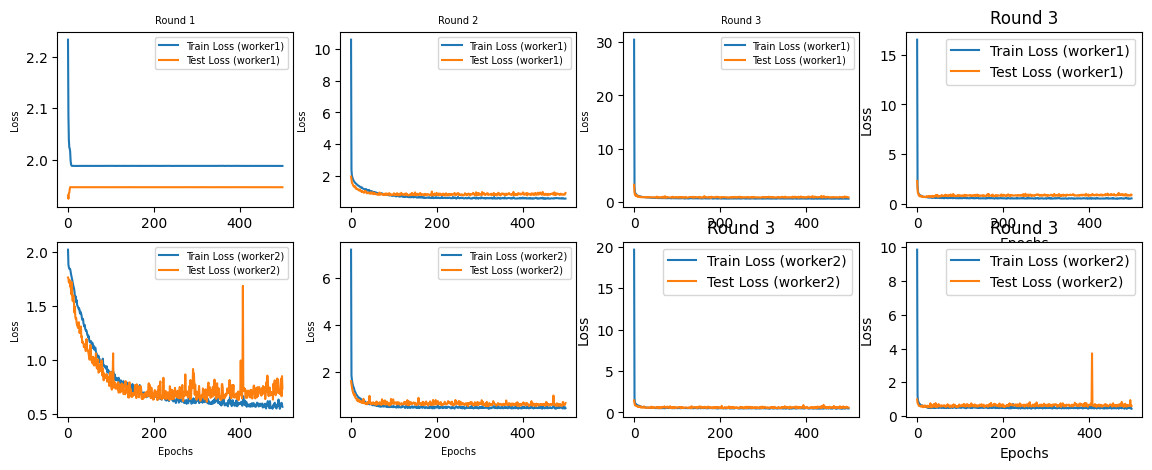

In [82]:
fig, axs = plt.subplots(2, 4, figsize=(14, 5))

# Plot train and test loss on first subplot
sns.lineplot(x=range(500), y=train_loss_max[0][:500], label="Train Loss", ax=axs[0,0])
sns.lineplot(x=range(500), y=test_loss_max[0][:500], label="Test Loss", ax=axs[0,0])
axs[0,0].set_title("Round 1", fontsize=7)
##axs[0,0].set_xlabel("Epochs")
axs[0,0].set_ylabel("Loss", fontsize=7)
axs[0,0].set_ylabel("Loss", fontsize=7)
legend = axs[0,0].legend(fontsize=7, bbox_to_anchor=(1, 1))
legend.texts[0].set_text("Train Loss (worker1)")
legend.texts[1].set_text("Test Loss (worker1)")



# Plot train and test loss on second subplot
sns.lineplot(x=range(500), y=train_loss_max[1][:500], label="Train Loss", ax=axs[1,0])
sns.lineplot(x=range(500), y=test_loss_max[1][:500], label="Test Loss", ax=axs[1,0])
#axs[1,0].set_title("Round 1", fontsize=7)
axs[1,0].set_xlabel("Epochs", fontsize=7)
axs[1,0].set_ylabel("Loss", fontsize=7)
axs[1,0].set_ylabel("Loss", fontsize=7)
legend = axs[1,0].legend(fontsize=7, bbox_to_anchor=(1, 1))
legend.texts[0].set_text("Train Loss (worker2)")
legend.texts[1].set_text("Test Loss (worker2)")

sns.lineplot(x=range(500), y=train_loss_max[2][:500], label="Train Loss", ax=axs[0,1])
sns.lineplot(x=range(500), y=test_loss_max[2][:500], label="Test Loss", ax=axs[0,1])
axs[0,1].set_title("Round 2", fontsize=7)
#axs[0,1].set_xlabel("Epochs", fontsize=7)
axs[0,1].set_ylabel("Loss", fontsize=7)
axs[0,1].set_ylabel("Loss", fontsize=7)
legend = axs[0,1].legend(fontsize=7, bbox_to_anchor=(1, 1))
legend.texts[0].set_text("Train Loss (worker1)")
legend.texts[1].set_text("Test Loss (worker1)")

sns.lineplot(x=range(500), y=train_loss_max[3][:500], label="Train Loss", ax=axs[1,1])
sns.lineplot(x=range(500), y=test_loss_max[3][:500], label="Test Loss", ax=axs[1,1])
#axs[1,1].set_title("Round 2")
axs[1,1].set_xlabel("Epochs", fontsize=7)
axs[1,1].set_ylabel("Loss", fontsize=7)
legend = axs[1,1].legend(fontsize=7, bbox_to_anchor=(1, 1))
legend.texts[0].set_text("Train Loss (worker2)")
legend.texts[1].set_text("Test Loss (worker2)")

sns.lineplot(x=range(500), y=train_loss_max[4][:500], label="Train Loss", ax=axs[0,2])
sns.lineplot(x=range(500), y=test_loss_max[4][:500], label="Test Loss", ax=axs[0,2])
axs[0,2].set_title("Round 3", fontsize=7)
#axs[0,2].set_xlabel("Epochs", fontsize=7)
axs[0,2].set_ylabel("Loss", fontsize=7)
legend = axs[0,2].legend(fontsize=7, bbox_to_anchor=(1, 1))
legend.texts[0].set_text("Train Loss (worker1)")
legend.texts[1].set_text("Test Loss (worker1)")

sns.lineplot(x=range(500), y=train_loss_max[6][:500], label="Train Loss", ax=axs[0,3])
sns.lineplot(x=range(500), y=test_loss_max[6][:500], label="Test Loss", ax=axs[0,3])
axs[0,3].set_title("Round 3")
axs[0,3].set_xlabel("Epochs")
axs[0,3].set_ylabel("Loss")
legend = axs[0,3].legend()
legend.texts[0].set_text("Train Loss (worker1)")
legend.texts[1].set_text("Test Loss (worker1)")

sns.lineplot(x=range(500), y=train_loss_max[5][:500], label="Train Loss", ax=axs[1,2])
sns.lineplot(x=range(500), y=test_loss_max[5][:500], label="Test Loss", ax=axs[1,2])
axs[1,2].set_title("Round 3")
axs[1,2].set_xlabel("Epochs")
axs[1,2].set_ylabel("Loss")
legend = axs[1,2].legend()
legend.texts[0].set_text("Train Loss (worker2)")
legend.texts[1].set_text("Test Loss (worker2)")

sns.lineplot(x=range(500), y=train_loss_max[7][:500], label="Train Loss", ax=axs[1,3])
sns.lineplot(x=range(500), y=test_loss_max[7][:500], label="Test Loss", ax=axs[1,3])
axs[1,3].set_title("Round 3")
axs[1,3].set_xlabel("Epochs")
axs[1,3].set_ylabel("Loss")
legend = axs[1,3].legend()
legend.texts[0].set_text("Train Loss (worker2)")
legend.texts[1].set_text("Test Loss (worker2)")

    

plt.show()

# Ploting avg-aggregation loss

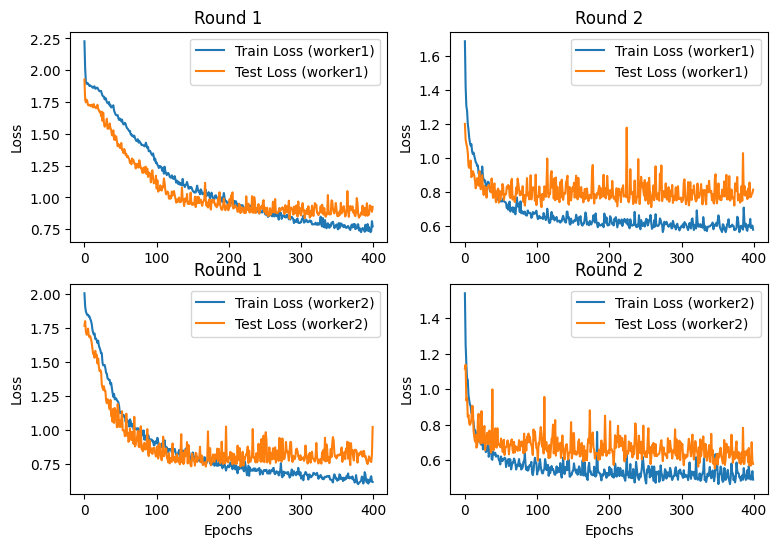

In [158]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Plot train and test loss on first subplot
sns.lineplot(x=range(400), y=train_loss_avg[0][:400], label="Train Loss", ax=axs[0,0])
sns.lineplot(x=range(400), y=test_loss_avg[0][:400], label="Test Loss", ax=axs[0,0])
axs[0,0].set_title("Round 1")
##axs[0,0].set_xlabel("Epochs")
axs[0,0].set_ylabel("Loss")
legend = axs[0,0].legend()
legend.texts[0].set_text("Train Loss (worker1)")
legend.texts[1].set_text("Test Loss (worker1)")


# Plot train and test loss on second subplot
sns.lineplot(x=range(400), y=train_loss_avg[2][:400], label="Train Loss", ax=axs[0,1])
sns.lineplot(x=range(400), y=test_loss_avg[2][:400], label="Test Loss", ax=axs[0,1])
axs[0,1].set_title("Round 2")
##axs[0,1].set_xlabel("Epochs")
axs[0,1].set_ylabel("Loss")
legend = axs[0,1].legend()
legend.texts[0].set_text("Train Loss (worker1)")
legend.texts[1].set_text("Test Loss (worker1)")

sns.lineplot(x=range(400), y=train_loss_avg[1][:400], label="Train Loss", ax=axs[1,0])
sns.lineplot(x=range(400), y=test_loss_avg[1][:400], label="Test Loss", ax=axs[1,0])
axs[1,0].set_title("Round 1")
axs[1,0].set_xlabel("Epochs")
axs[1,0].set_ylabel("Loss")
legend = axs[1,0].legend()
legend.texts[0].set_text("Train Loss (worker2)")
legend.texts[1].set_text("Test Loss (worker2)")

sns.lineplot(x=range(400), y=train_loss_avg[3][:400], label="Train Loss", ax=axs[1,1])
sns.lineplot(x=range(400), y=test_loss_avg[3][:400], label="Test Loss", ax=axs[1,1])
axs[1,1].set_title("Round 2")
axs[1,1].set_xlabel("Epochs")
axs[1,1].set_ylabel("Loss")
legend = axs[1,1].legend()
legend.texts[0].set_text("Train Loss (worker2)")
legend.texts[1].set_text("Test Loss (worker2)")
    
fig.savefig("loss_avg.png")
plt.show()

# Ploting median_aggregation loss

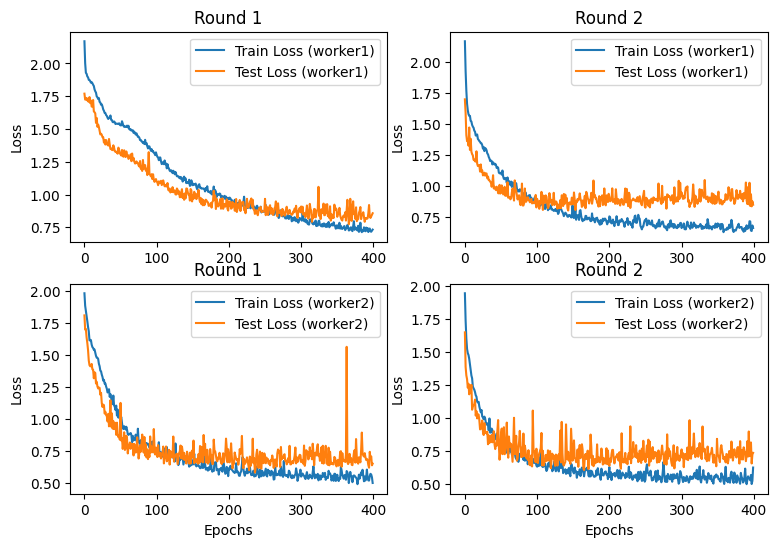

In [175]:
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Plot train and test loss on first subplot
sns.lineplot(x=range(400), y=train_loss_median[0][:400], label="Train Loss", ax=axs[0,0])
sns.lineplot(x=range(400), y=test_loss_median[0][:400], label="Test Loss", ax=axs[0,0])
axs[0,0].set_title("Round 1")
##axs[0,0].set_xlabel("Epochs")
axs[0,0].set_ylabel("Loss")
legend = axs[0,0].legend()
legend.texts[0].set_text("Train Loss (worker1)")
legend.texts[1].set_text("Test Loss (worker1)")


# Plot train and test loss on second subplot
sns.lineplot(x=range(400), y=train_loss_median[2][:400], label="Train Loss", ax=axs[0,1])
sns.lineplot(x=range(400), y=test_loss_median[2][:400], label="Test Loss", ax=axs[0,1])
axs[0,1].set_title("Round 2")
##axs[0,1].set_xlabel("Epochs")
axs[0,1].set_ylabel("Loss")
legend = axs[0,1].legend()
legend.texts[0].set_text("Train Loss (worker1)")
legend.texts[1].set_text("Test Loss (worker1)")

sns.lineplot(x=range(400), y=train_loss_median[1][:400], label="Train Loss", ax=axs[1,0])
sns.lineplot(x=range(400), y=test_loss_median[1][:400], label="Test Loss", ax=axs[1,0])
axs[1,0].set_title("Round 1")
axs[1,0].set_xlabel("Epochs")
axs[1,0].set_ylabel("Loss")
legend = axs[1,0].legend()
legend.texts[0].set_text("Train Loss (worker2)")
legend.texts[1].set_text("Test Loss (worker2)")

sns.lineplot(x=range(400), y=train_loss_median[3][:400], label="Train Loss", ax=axs[1,1])
sns.lineplot(x=range(400), y=test_loss_median[3][:400], label="Test Loss", ax=axs[1,1])
axs[1,1].set_title("Round 2")
axs[1,1].set_xlabel("Epochs")
axs[1,1].set_ylabel("Loss")
legend = axs[1,1].legend()
legend.texts[0].set_text("Train Loss (worker2)")
legend.texts[1].set_text("Test Loss (worker2)")
    
fig.savefig("loss_median.png")
plt.show()